<h1><center>Credit Card Fraud Detection</center></h1>
<h1><left>Problem Statement:</left></h1>

Problem Statement
In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.

 

Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. You can learn more about transactional data and the creation of historical variables from the link attached here. You may find this helpful in the capstone project while building the fraud detection model. Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.

 

Understanding and Defining Fraud

Credit card fraud is any dishonest act or behaviour to obtain information without the proper authorisation of the account holder for financial gain. Among the different ways of committing fraud, skimming is the most common one. Skimming is a method used for duplicating information located on the magnetic stripe of the card.  Apart from this, other ways of making fraudulent transactions are as follows:

Manipulation or alteration of genuine cards
Creation of counterfeit cards
Stolen or lost credit cards
Fraudulent telemarketing

### Importing Required libraries

In [1]:
#Importing the Required Librarires
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)


import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns


import math
from sklearn import metrics
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer
StdScaler = StandardScaler()
Pt = PowerTransformer()


from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score, StratifiedKFold, RandomizedSearchCV


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN

from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


#### Plotly 
import plotly
import plotly.graph_objects as go
import pandas as pd
from ipywidgets import widgets


In [2]:
#pip install imblearn

In [3]:
#pip install delayed

### Loading Datasets

In [4]:
## Reading first data file
df_1 = pd.read_csv('fraudTrain.csv')
df_1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category        amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net   4.970000   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos 107.230000  Stephanie   
2                fraud_Lind-Buckridge  entertainment 220.110000     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport  45.000000     Jeremy   
4                 fraud_Keeling-Crist       misc_pos  41.960000      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

        lat        long  city_pop                                job  \
0 36.078800  -81.178100      3495          Psychologist, counselling   
1 48.887800 -118.210500       149  Special educational needs teacher   
2 42.180800 -112.262000      4154        Nature conservation officer   
3 46.230600 -112.113800      1939                    Patent attorney   
4 38.420700  -79.462900        99     Dance movement psychotherapist   

          dob                         trans_num   unix_time  merch_lat  \
0  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

   merch_long  is_fraud  
0  -82.048315         0  
1 -118.186462         0  
2 -112.154481         0  
3 -112.561071         0  
4  -78.632459         0

In [5]:
## As the data file contain seperate index column we need to drop the first column
df_1.drop(df_1.columns[0],axis=1,inplace=True)
df_1.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job         dob  \
0  -81.178100      3495          Psychologist, counselling  1988-03-09   
1 -118.210500       149  Special educational needs teacher  1978-06-21   
2 -112.262000      4154        Nature conservation officer  1962-01-19   
3 -112.113800      1939                    Patent attorney  1967-01-12   
4  -79.462900        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [6]:
# Loading second data file
df_2 = pd.read_csv("fraudTest.csv")
df_2 = df_2.drop(df_2.columns[0], axis=1)
df_2.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category       amt   first  \
0                 fraud_Kirlin and Sons   personal_care  2.860000    Jeff   
1                  fraud_Sporer-Keebler   personal_care 29.840000  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness 41.280000  Ashley   
3                     fraud_Haley Group        misc_pos 60.050000   Brian   
4                 fraud_Johnston-Casper          travel  3.190000  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

        lat        long  city_pop                     job         dob  \
0 33.965900  -80.935500    333497     Mechanical engineer  1968-03-19   
1 40.320700 -110.436000       302  Sales professional, IT  1990-01-17   
2 40.672900  -73.536500     34496       Librarian, public  1970-10-21   
3 28.569700  -80.819100     54767            Set designer  1987-07-25   
4 44.252900  -85.017000      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

#### Note: After checking columns for the two sets are identical,merging the two datasets

In [7]:
cols1 = list(df_1.columns)
cols2 = list(df_2.columns)
cols1,cols2

(['trans_date_trans_time',
  'cc_num',
  'merchant',
  'category',
  'amt',
  'first',
  'last',
  'gender',
  'street',
  'city',
  'state',
  'zip',
  'lat',
  'long',
  'city_pop',
  'job',
  'dob',
  'trans_num',
  'unix_time',
  'merch_lat',
  'merch_long',
  'is_fraud'],
 ['trans_date_trans_time',
  'cc_num',
  'merchant',
  'category',
  'amt',
  'first',
  'last',
  'gender',
  'street',
  'city',
  'state',
  'zip',
  'lat',
  'long',
  'city_pop',
  'job',
  'dob',
  'trans_num',
  'unix_time',
  'merch_lat',
  'merch_long',
  'is_fraud'])

### Inspecting the data frames which are loaded

In [8]:
df_1.shape  ## Checking for number of rows and columns 

(1296675, 22)

In [9]:
df_2.shape

(555719, 22)

In [10]:
## Concatinating the dataframes into single dataframe
df = pd.concat([df_1,df_2])
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job         dob  \
0  -81.178100      3495          Psychologist, counselling  1988-03-09   
1 -118.210500       149  Special educational needs teacher  1978-06-21   
2 -112.262000      4154        Nature conservation officer  1962-01-19   
3 -112.113800      1939                    Patent attorney  1967-01-12   
4  -79.462900        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [11]:
df.tail()

trans_date_trans_time            cc_num               merchant  \
555714   2020-12-31 23:59:07    30560609640617  fraud_Reilly and Sons   
555715   2020-12-31 23:59:09  3556613125071656   fraud_Hoppe-Parisian   
555716   2020-12-31 23:59:15  6011724471098086        fraud_Rau-Robel   
555717   2020-12-31 23:59:24     4079773899158  fraud_Breitenberg LLC   
555718   2020-12-31 23:59:34  4170689372027579      fraud_Dare-Marvin   

              category        amt    first     last gender  \
555714  health_fitness  43.770000  Michael    Olson      M   
555715       kids_pets 111.840000     Jose  Vasquez      M   
555716       kids_pets  86.880000      Ann   Lawson      F   
555717          travel   7.990000     Eric  Preston      M   
555718   entertainment  38.130000   Samuel     Frey      M   

                            street          city state    zip       lat  \
555714         558 Michael Estates         Luray    MO  63453 40.493100   
555715         572 Davis Mountains  Lake Jackson    TX  77566 29.039300   
555716  144 Evans Islands Apt. 683       Burbank    WA  99323 46.196600   
555717  7020 Doyle Stream Apt. 951          Mesa    ID  83643 44.625500   
555718    830 Myers Plaza Apt. 384        Edmond    OK  73034 35.666500   

              long  city_pop             job         dob  \
555714  -91.891200       519    Town planner  1966-02-13   
555715  -95.440100     28739  Futures trader  1999-12-27   
555716 -118.901700      3684        Musician  1981-11-29   
555717 -116.449300       129    Cartographer  1965-12-15   
555718  -97.479800    116001     Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.080888   
555718  1765bb45b3aa3224b4cdcb6e7a96cee3  1388534374  36.210097  -97.036372   

        is_fraud  
555714         0  
555715         0  
555716         0  
555717         0  
555718         0

#### Inspecting master dataframe

In [12]:
df.shape  ## Checking for no of rows and columns in dataframe

(1852394, 22)

In [13]:
df.info() ## Checking datatypes summary and other info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [14]:
df.describe() ## TTo get statistical info about numerical columns

cc_num            amt            zip            lat  \
count             1852394.000000 1852394.000000 1852394.000000 1852394.000000   
mean   417386038394006464.000000      70.063567   48813.258191      38.539311   
std   1309115265318020352.000000     159.253975   26881.845966       5.071470   
min           60416207185.000000       1.000000    1257.000000      20.027100   
25%       180042946491150.000000       9.640000   26237.000000      34.668900   
50%      3521417320836166.000000      47.450000   48174.000000      39.354300   
75%      4642255475285942.000000      83.100000   72042.000000      41.940400   
max   4992346398065154048.000000   28948.900000   99921.000000      66.693300   

                long       city_pop         unix_time      merch_lat  \
count 1852394.000000 1852394.000000    1852394.000000 1852394.000000   
mean      -90.227832   88643.674509 1358674218.834364      38.538976   
std        13.747895  301487.618344   18195081.387560       5.105604   
min      -165.672300      23.000000 1325376018.000000      19.027422   
25%       -96.798000     741.000000 1343016823.750000      34.740122   
50%       -87.476900    2443.000000 1357089331.000000      39.368900   
75%       -80.158000   20328.000000 1374581485.250000      41.956263   
max       -67.950300 2906700.000000 1388534374.000000      67.510267   

          merch_long       is_fraud  
count 1852394.000000 1852394.000000  
mean      -90.227940       0.005210  
std        13.759692       0.071992  
min      -166.671575       0.000000  
25%       -96.899440       0.000000  
50%       -87.440694       0.000000  
75%       -80.245108       0.000000  
max       -66.950902       1.000000

In [15]:
df.isnull().sum()  ## Checking for Null values 

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [16]:
df.nunique().sort_values()  ## Checking for unique values in each column to get idea of columns

is_fraud                       2
gender                         2
category                      14
state                         51
first                        355
last                         486
job                          497
merchant                     693
city_pop                     891
city                         906
lat                          983
long                         983
dob                          984
zip                          985
cc_num                       999
street                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64

#### Inspection of Target variable ['is_fraud'] and it's distribution in dataframe

In [17]:
df.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

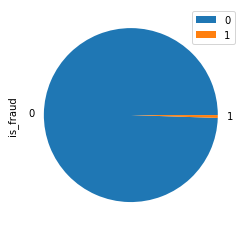

In [18]:
### Target variable is_fraud in our data set
## Lets check how the class is for target variable

df.is_fraud.value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()

In [19]:
df.dtypes  ## Datatypes of columns

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

#### Understanding amount ['amt'] variable and it's statistical description

In [20]:
df.amt.describe()   ## Amount variable has 

count   1852394.000000
mean         70.063567
std         159.253975
min           1.000000
25%           9.640000
50%          47.450000
75%          83.100000
max       28948.900000
Name: amt, dtype: float64

##### Note: Amount value ranges from 1 to 28948,however the quantiles at 75 is less than 100, so definitely it needs to be furthur inspection 

#### Visualizing amount variable to get understand where datapoints are more concentrated 

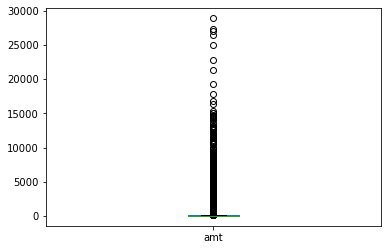

In [21]:
df['amt'].plot.box()
plt.show()

##### Inference: Now by above visualization we could see more thickness at 0 to 5k and slightly decreased till 15000 and after that it is negligible when compared. So we need to scale this variable while doing ML algorithm. 

After inspection of columns we could see there is trans_date_trans_time column which is particularly automated from system at the time of transaction, 
however for our better convience of EDA, let's derive some variables and draw insgights with that variables

#### Converting trans_date_trans_time to datetime format

In [22]:
### Converting data type of trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']) ## pd.datatime is to extract dates and time in our required format 

##### Extracting Year & Month for each entry

In [23]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('m')  ## adding year & month for each id 
df['year_month']


0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

In [24]:
df.head()   ## Inspecting data frame at regular intervals is necessary to go on track 

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job         dob  \
0  -81.178100      3495          Psychologist, counselling  1988-03-09   
1 -118.210500       149  Special educational needs teacher  1978-06-21   
2 -112.262000      4154        Nature conservation officer  1962-01-19   
3 -112.113800      1939                    Patent attorney  1967-01-12   
4  -79.462900        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud year_month  
0         0    2019-01  
1         0    2019-01  
2         0    2019-01  
3         0    2019-01  
4         0    2019-01

##### Extracting day for each entry

In [25]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()  
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

##### Extracting transaction hour for each entry

In [26]:
df['t_hour'] = df['trans_date_trans_time'].dt.hour
df['t_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: t_hour, Length: 1852394, dtype: int64

##### Extracting Month Name for each entry

In [27]:
df['month'] = df['trans_date_trans_time'].dt.month_name()

In [28]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job         dob  \
0  -81.178100      3495          Psychologist, counselling  1988-03-09   
1 -118.210500       149  Special educational needs teacher  1978-06-21   
2 -112.262000      4154        Nature conservation officer  1962-01-19   
3 -112.113800      1939                    Patent attorney  1967-01-12   
4  -79.462900        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud year_month day_of_week  t_hour    month  
0         0    2019-01     Tuesday       0  January  
1         0    2019-01     Tuesday       0  January  
2         0    2019-01     Tuesday       0  January  
3         0    2019-01     Tuesday       0  January  
4         0    2019-01     Tuesday       0  January

#### We could see there is dob column, for best use of EDA let's use this to extract age of customer

In [29]:
df['dob'] = pd.to_datetime(df['dob'])

In [30]:
df['age'] = (df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y')
df['age'] = round(df.age)
df['age'] = df.age.astype('int')

In [31]:
df.age.head()

0    31
1    41
2    57
3    52
4    33
Name: age, dtype: int32

In [32]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job        dob  \
0  -81.178100      3495          Psychologist, counselling 1988-03-09   
1 -118.210500       149  Special educational needs teacher 1978-06-21   
2 -112.262000      4154        Nature conservation officer 1962-01-19   
3 -112.113800      1939                    Patent attorney 1967-01-12   
4  -79.462900        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud year_month day_of_week  t_hour    month  age  
0         0    2019-01     Tuesday       0  January   31  
1         0    2019-01     Tuesday       0  January   41  
2         0    2019-01     Tuesday       0  January   57  
3         0    2019-01     Tuesday       0  January   52  
4         0    2019-01     Tuesday       0  January   33

## Exploratory Data Analysis

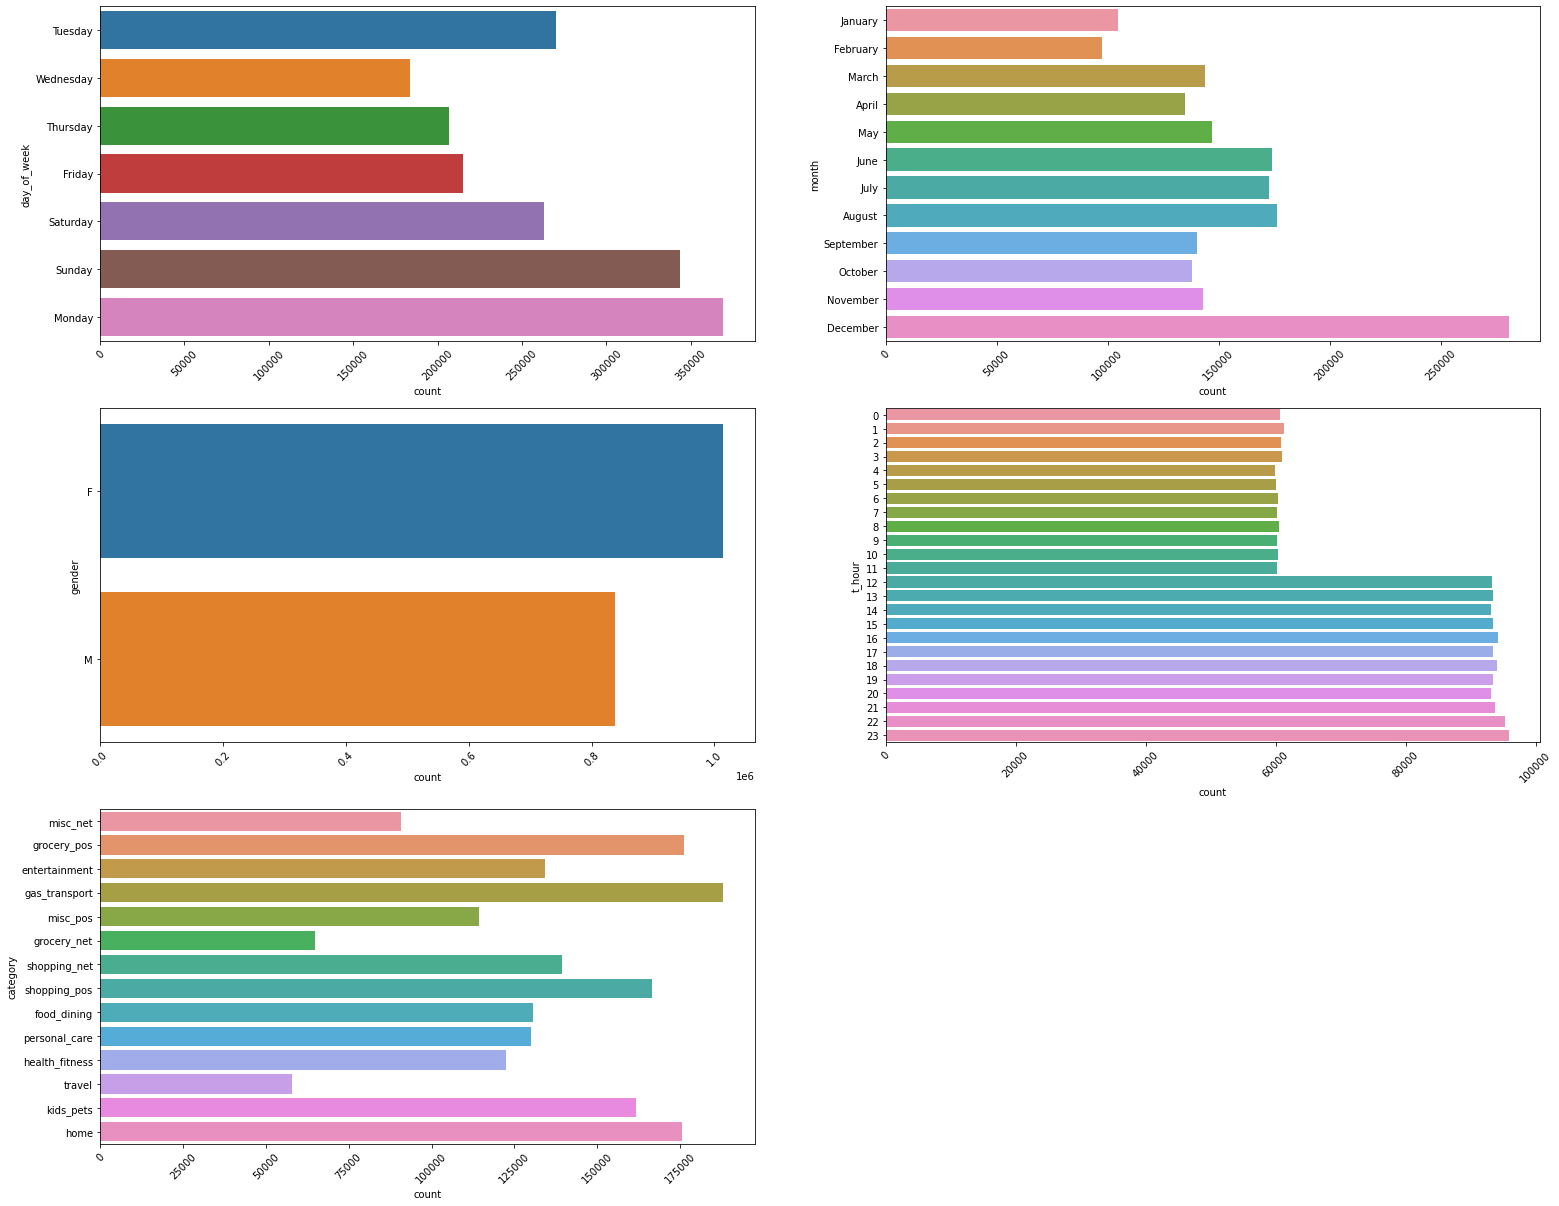

In [33]:
cat_cols = ['day_of_week','month','gender','t_hour','category']

plt.figure(figsize=(10,80))
cols = cat_cols
for i in range(0,len(cols)):
    plt.subplot(11,2,i+1)
    sns.countplot(y=df[cols[i]])
    plt.xticks(rotation=45)
plt.subplots_adjust(left=0,right=2)

In [34]:
df.job.value_counts(ascending=False).head(20)

Film/video editor                      13898
Exhibition designer                    13167
Surveyor, land/geomatics               12436
Naval architect                        12434
Materials engineer                     11711
Designer, ceramics/pottery             11688
Environmental consultant               10974
Financial adviser                      10963
Systems developer                      10962
IT trainer                             10943
Copywriter, advertising                10241
Scientist, audiological                10234
Chartered public finance accountant    10211
Chief Executive Officer                10199
Podiatrist                              9525
Comptroller                             9515
Magazine features editor                9506
Agricultural consultant                 9500
Paramedic                               9494
Sub                                     9488
Name: job, dtype: int64

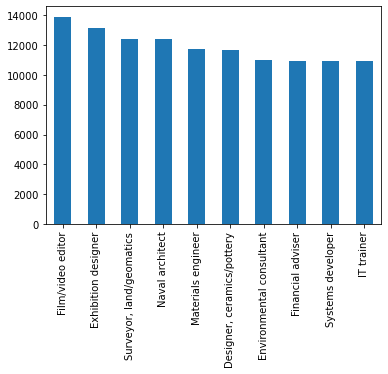

In [35]:
df.job.value_counts(ascending=False).head(10).plot.bar()
plt.show()

#### Distribution of target variable across different variables

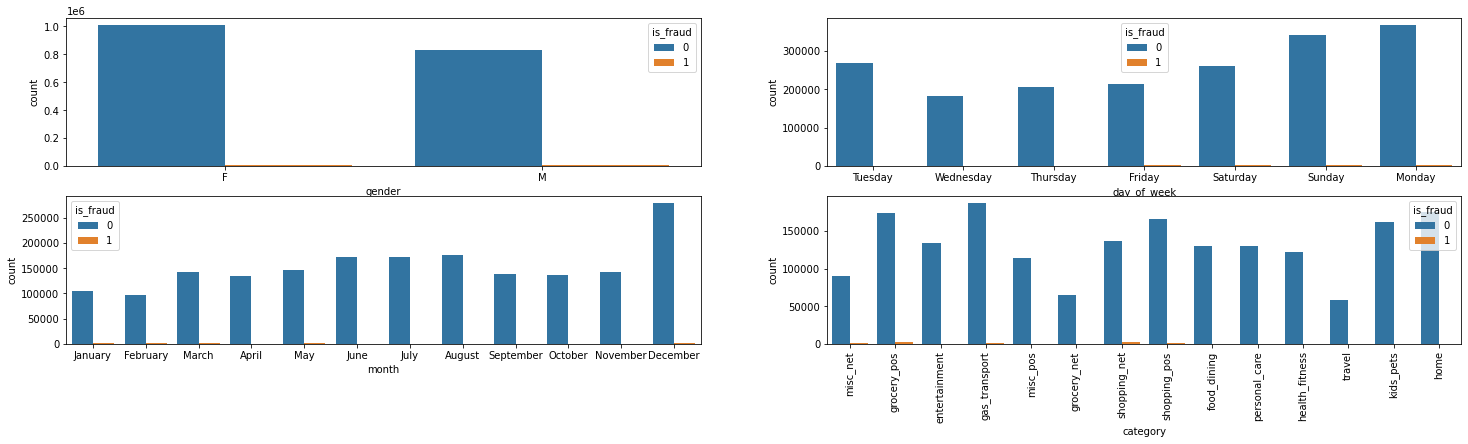

In [36]:
plt.figure(figsize=(25,6))
plt.subplot(2,2,1)
sns.countplot(df['gender'],hue = df.is_fraud)

plt.subplot(2,2,2)
sns.countplot(df['day_of_week'],hue = df.is_fraud)

plt.subplot(2,2,3)
sns.countplot(df['month'],hue = df.is_fraud)

plt.subplot(2,2,4)
sns.countplot(df['category'],hue = df.is_fraud)
plt.xticks(rotation=90)


plt.show()

In [37]:
df.state.value_counts().head(10)

TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
Name: state, dtype: int64

### Amount Variable across target variable 

In [38]:
df['amt'].loc[df['is_fraud']==1].describe()

count   9651.000000
mean     530.661412
std      391.028873
min        1.060000
25%      240.075000
50%      390.000000
75%      902.365000
max     1376.040000
Name: amt, dtype: float64

In [39]:
df['amt'].loc[df['is_fraud']==1].sum()

5121413.290000001

##### Visual representation

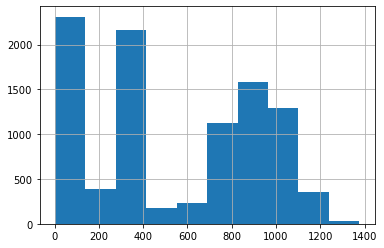

In [40]:
df.amt.loc[df['is_fraud']==1].hist()
plt.show()

In [41]:
df['amt'].loc[df['is_fraud']==0].describe()

count   1842743.000000
mean         67.651278
std         153.548108
min           1.000000
25%           9.610000
50%          47.240000
75%          82.560000
max       28948.900000
Name: amt, dtype: float64

In [42]:
df['amt'].loc[df['is_fraud']==0].sum()

124663918.71999995

In [43]:
# x = df.trans_num.loc[df['is_fraud']==1]
# y = df['amt'].loc[df['is_fraud']==1]

# plt.scatter(x, y)
# plt.show()

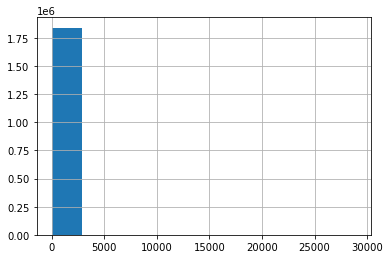

In [44]:
df['amt'].loc[df['is_fraud']==0].hist()
plt.show()

##### Lets get some insights from newly added columns 

In [45]:
df.columns 

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age'],
      dtype='object')

#### Month wise transactions flow from Jan'2019 to Dec'2020

In [46]:
month_wise = df.groupby(df['year_month'])[['trans_num']].count().reset_index()
month_wise.columns = ['year_month','total_no_of_trans']

In [47]:
month_wise.tail()

year_month  total_no_of_trans
19    2020-08              88759
20    2020-09              69533
21    2020-10              69348
22    2020-11              72635
23    2020-12             139538

##### Non-Fraud Transactions flow Month-wise

In [48]:
fraud_no = df[df['is_fraud']==0]
month_wise_fraud_no = fraud_no.groupby(fraud_no['year_month'])[['trans_num']].count().reset_index()
month_wise_fraud_no.columns = ['year_month','total_no_of_trans']

In [49]:
month_wise_fraud_no.head()

year_month  total_no_of_trans
0    2019-01              52019
1    2019-02              49349
2    2019-03              70445
3    2019-04              67702
4    2019-05              72124

##### Fraud Transactions flow Month-wise

In [50]:
fraud_yes = df[df['is_fraud']==1]

month_wise_fraud_yes = fraud_yes.groupby(fraud_yes['year_month'])[['trans_num']].count().reset_index()
month_wise_fraud_yes.columns = ['year_month','total_no_of_trans']

In [51]:
month_wise_fraud_yes.head()

year_month  total_no_of_trans
0    2019-01                506
1    2019-02                517
2    2019-03                494
3    2019-04                376
4    2019-05                408

In [52]:
month_wise_summary = pd.merge(left=month_wise, right=month_wise_fraud_yes, how='inner', left_on='year_month', right_on='year_month')
month_wise_summary.columns = ['year_month','Total Transactions','Fraud_Trans Yes']

In [53]:
month_wise_summary = pd.merge(left=month_wise_summary, right=month_wise_fraud_no, how='inner', left_on='year_month', right_on='year_month')
month_wise_summary.columns = ['year_month','Total Transactions','Fraud_Trans Yes','Fraud_Trans No']

In [54]:
month_wise_summary['Fraud Tr Percentage'] = 100*(month_wise_summary['Fraud_Trans Yes']/month_wise_summary['Total Transactions'])

In [55]:
month_wise_summary.sort_values(by='Fraud Tr Percentage',ascending=False)

year_month  Total Transactions  Fraud_Trans Yes  Fraud_Trans No  \
1     2019-02               49866              517           49349   
0     2019-01               52525              506           52019   
16    2020-05               74343              527           73816   
13    2020-02               47791              336           47455   
2     2019-03               70939              494           70445   
9     2019-10               68758              454           68304   
12    2020-01               52202              343           51859   
14    2020-03               72850              444           72406   
8     2019-09               70652              418           70234   
4     2019-05               72532              408           72124   
21    2020-10               69348              384           68964   
3     2019-04               68078              376           67702   
10    2019-11               70421              388           70033   
17    2020-06               87805              467           87338   
20    2020-09               69533              340           69193   
19    2020-08               88759              415           88344   
15    2020-04               66892              302           66590   
7     2019-08               87359              382           86977   
11    2019-12              141060              592          140468   
5     2019-06               86064              354           85710   
22    2020-11               72635              294           72341   
6     2019-07               86596              331           86265   
18    2020-07               85848              321           85527   
23    2020-12              139538              258          139280   

    Fraud Tr Percentage  
1              1.036779  
0              0.963351  
16             0.708876  
13             0.703061  
2              0.696373  
9              0.660287  
12             0.657063  
14             0.609472  
8              0.591632  
4              0.562510  
21             0.553729  
3              0.552308  
10             0.550972  
17             0.531860  
20             0.488976  
19             0.467558  
15             0.451474  
7              0.437276  
11             0.419680  
5              0.411322  
22             0.404764  
6              0.382235  
18             0.373917  
23             0.184896

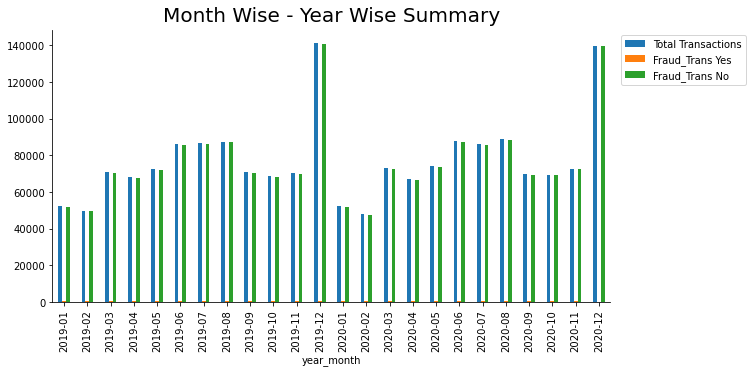

In [56]:
ax = month_wise_summary.plot(x='year_month', y=['Total Transactions','Fraud_Trans Yes','Fraud_Trans No'], kind='bar',figsize=(10,5))
ax.set_title('Month Wise - Year Wise Summary',fontsize=20, y=1.01)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
sns.despine(left=False, bottom=False)
plt.show()

#### Summary/Inference: 
1) By above stats we could see maximum of 1% and less transactions are reported as fraud across everymonth. 
In early of 2019 Jan and Feb have high percentage of fraud transactions yet number of transactions are moderate.

2) In the end of 2020 Dec the transation size is big,however fraud transactions percentage are less. 

3) But while checking at numbers every month we could see at least 250 reported fraud transactions.

### Interactive Graphs for dashborad

In [57]:
month_wise_summary.dtypes

year_month             period[M]
Total Transactions         int64
Fraud_Trans Yes            int64
Fraud_Trans No             int64
Fraud Tr Percentage      float64
dtype: object

In [58]:
month_wise_summary.year_month = month_wise_summary.astype('str')

In [59]:
month_wise_summary.dtypes

year_month              object
Total Transactions       int64
Fraud_Trans Yes          int64
Fraud_Trans No           int64
Fraud Tr Percentage    float64
dtype: object

In [60]:
month_wise_summary.head()

year_month  Total Transactions  Fraud_Trans Yes  Fraud_Trans No  \
0    2019-01               52525              506           52019   
1    2019-02               49866              517           49349   
2    2019-03               70939              494           70445   
3    2019-04               68078              376           67702   
4    2019-05               72532              408           72124   

   Fraud Tr Percentage  
0             0.963351  
1             1.036779  
2             0.696373  
3             0.552308  
4             0.562510

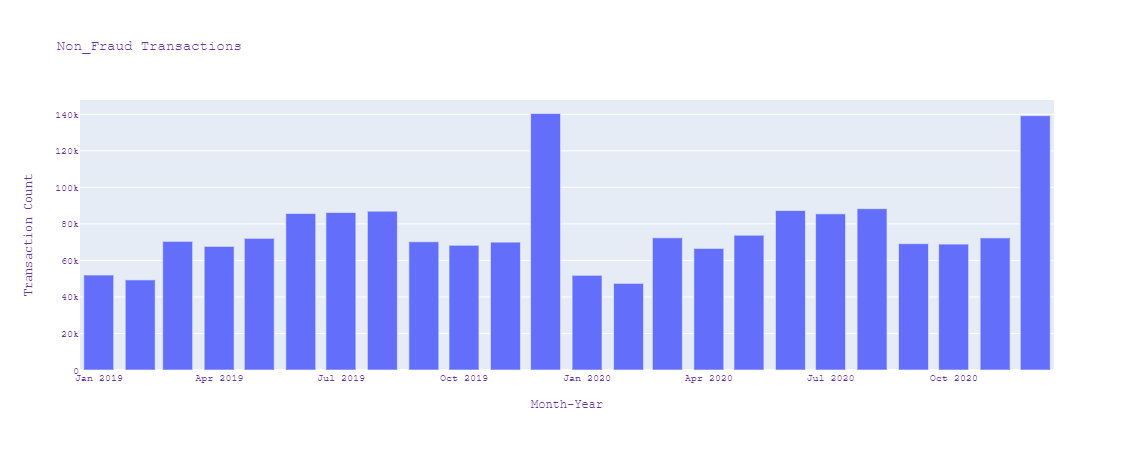

In [61]:
fig = go.Figure([go.Bar(
            x=list(month_wise_summary.year_month), 
            y=month_wise_summary['Fraud_Trans No'],
        )])

# add layout object
fig.update_layout(
    title="Non_Fraud Transactions",
    xaxis_title="Month-Year",
    yaxis_title="Transaction Count",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=10,
        
        color="RebeccaPurple"
    )
)


fig.show()

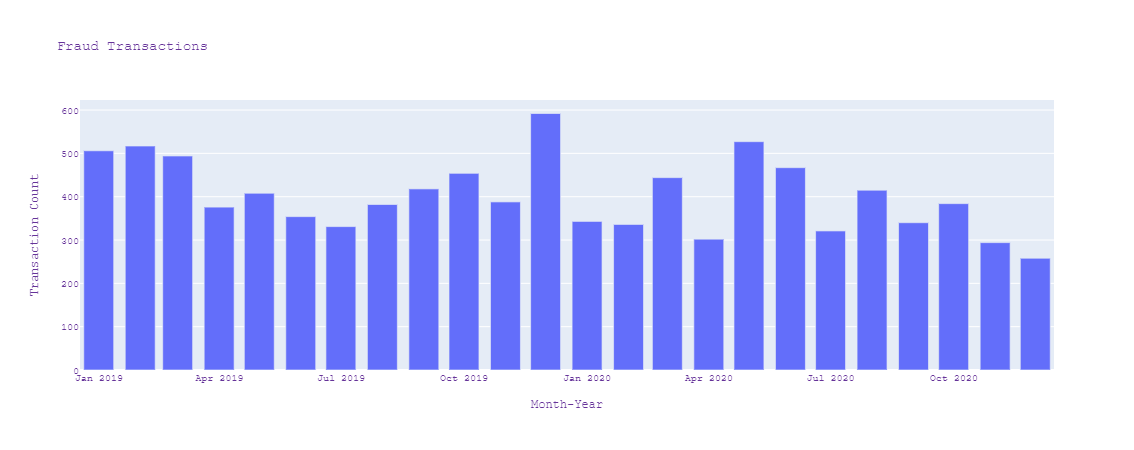

In [62]:
fig = go.Figure([go.Bar(
            x=list(month_wise_summary.year_month), 
            y=month_wise_summary['Fraud_Trans Yes'],
        )])

# add layout object
fig.update_layout(
    title="Fraud Transactions",
    xaxis_title="Month-Year",
    yaxis_title="Transaction Count",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=10,
        
        color="RebeccaPurple"
    )
)


fig.show()

#### Category Wise

In [63]:
cat_wise = df.groupby(df['category'])[['trans_num']].count().reset_index()
cat_wise.columns = ['category','total_no_of_trans']

In [64]:
cat_wise.head()

category  total_no_of_trans
0  entertainment             134118
1    food_dining             130729
2  gas_transport             188029
3    grocery_net              64878
4    grocery_pos             176191

In [65]:
# fraud_no = df[df['is_fraud']==0]
cat_wise_fraud_no = fraud_no.groupby(fraud_no['category'])[['trans_num']].count().reset_index()
cat_wise_fraud_no.columns = ['category','total_no_of_trans']

In [66]:
# fraud_yes = df[df['is_fraud']==1]
cat_wise_fraud_yes = fraud_yes.groupby(fraud_yes['category'])[['trans_num']].count().reset_index()
cat_wise_fraud_yes.columns = ['category','total_no_of_trans']

In [67]:
cat_wise_fraud_yes.head()

category  total_no_of_trans
0  entertainment                292
1    food_dining                205
2  gas_transport                772
3    grocery_net                175
4    grocery_pos               2228

In [68]:
cat_wise_summary = pd.merge(left=cat_wise, right=cat_wise_fraud_yes, how='inner', left_on='category', right_on='category')
cat_wise_summary.columns = ['category','Total Transactions','Fraud_Trans Yes']

In [69]:
cat_wise_summary = pd.merge(left=cat_wise_summary, right=cat_wise_fraud_no, how='inner', left_on='category', right_on='category')
cat_wise_summary.columns = ['category','Total Transactions','Fraud_Trans Yes','Fraud_Trans No']

In [70]:
cat_wise_summary

category  Total Transactions  Fraud_Trans Yes  Fraud_Trans No
0    entertainment              134118              292          133826
1      food_dining              130729              205          130524
2    gas_transport              188029              772          187257
3      grocery_net               64878              175           64703
4      grocery_pos              176191             2228          173963
5   health_fitness              122553              185          122368
6             home              175460              265          175195
7        kids_pets              161727              304          161423
8         misc_net               90654             1182           89472
9         misc_pos              114229              322          113907
10   personal_care              130085              290          129795
11    shopping_net              139322             2219          137103
12    shopping_pos              166463             1056          165407
13          travel               57956              156           57800

In [71]:
cat_wise_summary['Fraud Tr Percentage'] = 100*(cat_wise_summary['Fraud_Trans Yes']/cat_wise_summary['Total Transactions'])

In [72]:
cat_wise_summary.sort_values(by='Fraud Tr Percentage',ascending=False)

category  Total Transactions  Fraud_Trans Yes  Fraud_Trans No  \
11    shopping_net              139322             2219          137103   
8         misc_net               90654             1182           89472   
4      grocery_pos              176191             2228          173963   
12    shopping_pos              166463             1056          165407   
2    gas_transport              188029              772          187257   
9         misc_pos              114229              322          113907   
3      grocery_net               64878              175           64703   
13          travel               57956              156           57800   
10   personal_care              130085              290          129795   
0    entertainment              134118              292          133826   
7        kids_pets              161727              304          161423   
1      food_dining              130729              205          130524   
6             home              175460              265          175195   
5   health_fitness              122553              185          122368   

    Fraud Tr Percentage  
11             1.592713  
8              1.303859  
4              1.264537  
12             0.634375  
2              0.410575  
9              0.281890  
3              0.269737  
13             0.269170  
10             0.222931  
0              0.217719  
7              0.187971  
1              0.156813  
6              0.151032  
5              0.150955

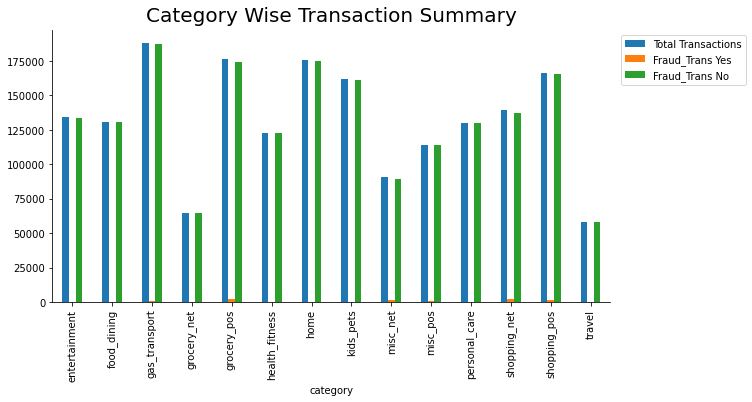

In [73]:
ax = cat_wise_summary.plot(x='category', y=['Total Transactions','Fraud_Trans Yes','Fraud_Trans No'], kind='bar',figsize=(10,5))
ax.set_title('Category Wise Transaction Summary',fontsize=20, y=1.01)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
sns.despine(left=False, bottom=False)
plt.show()

#### Summary/Inference: 
1) By above stats we could see maximum of 1.6% and less transactions are reported as fraud across different category. 

2) The highest reported fraud are under shooping over net and pos and also grocessaris at store and misc at net are highest

3) These categories are significantly higher and around above 2K transactions are reported as fraud

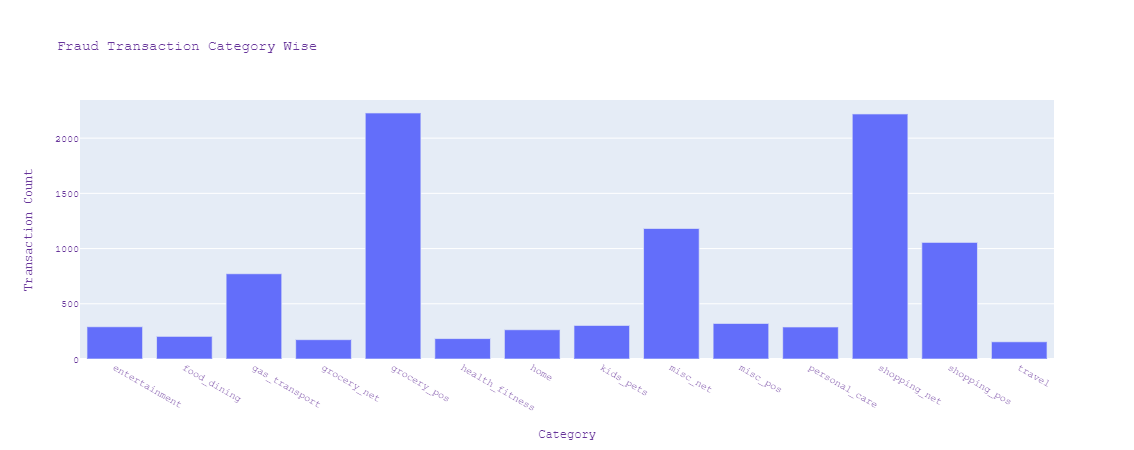

In [74]:
fig = go.Figure([go.Bar(
            x=list(cat_wise_summary.category), 
            y=cat_wise_summary['Fraud_Trans Yes'],
        )])

# add layout object
fig.update_layout(
    title="Fraud Transaction Category Wise",
    xaxis_title="Category",
    yaxis_title="Transaction Count",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=10,
        
        color="RebeccaPurple"
    )
)


fig.show()

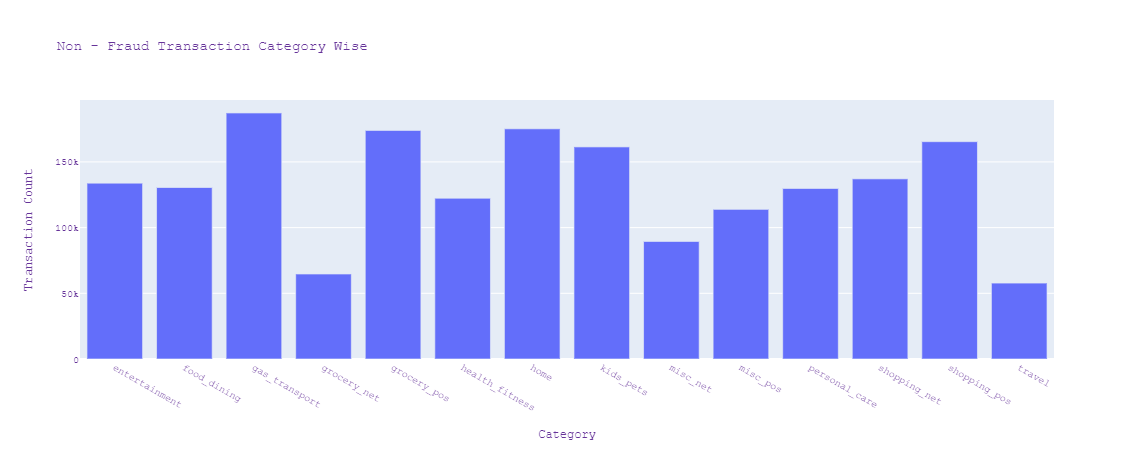

In [75]:
fig = go.Figure([go.Bar(
            x=list(cat_wise_summary.category), 
            y=cat_wise_summary['Fraud_Trans No'],
        )])

# add layout object
fig.update_layout(
    title="Non - Fraud Transaction Category Wise",
    xaxis_title="Category",
    yaxis_title="Transaction Count",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=10,
        
        color="RebeccaPurple"
    )
)


fig.show()

### Day Wise Transactions

This particualr analysis is to narrow down our analysis to get understanding on which day of week the fraud customers are reported more 
and which day the fraud customers are getting less and what's need to be done on these days

In [76]:
days_wise = fraud_yes.groupby(fraud_yes['day_of_week'])[['cc_num']].nunique().reset_index()
days_wise.columns = ['day_of_week','fraud_customers']


In [77]:
days_wise.sort_values(by='fraud_customers',ascending=False)

day_of_week  fraud_customers
2    Saturday              301
0      Friday              289
3      Sunday              289
1      Monday              270
4    Thursday              263
5     Tuesday              263
6   Wednesday              252

### Month Wise Fraud Customers

In [78]:
cust_count = fraud_yes.groupby(fraud_yes['year_month'])[['cc_num']].nunique().reset_index()
cust_count.columns = ['year_month','fraud_customers']
cust_count.sort_values('fraud_customers',ascending=False)

year_month  fraud_customers
11    2019-12               62
16    2020-05               54
1     2019-02               53
0     2019-01               50
9     2019-10               50
2     2019-03               49
17    2020-06               47
14    2020-03               45
8     2019-09               44
4     2019-05               42
3     2019-04               41
19    2020-08               41
10    2019-11               41
12    2020-01               40
7     2019-08               39
21    2020-10               39
15    2020-04               36
6     2019-07               36
13    2020-02               35
18    2020-07               35
5     2019-06               35
20    2020-09               35
22    2020-11               31
23    2020-12               26

#### Gender - Wise Distribution

In [79]:
df.gender.value_counts(normalize=True)

F   0.547804
M   0.452196
Name: gender, dtype: float64

In [80]:
gen_wise_fraud_no = fraud_no.groupby(fraud_no['gender'])[['trans_num']].count().reset_index()
gen_wise_fraud_no.columns = ['gender','total_no_of_trans']
gen_wise_fraud_yes = fraud_yes.groupby(fraud_yes['gender'])[['trans_num']].count().reset_index()
gen_wise_fraud_yes.columns = ['gender','total_no_of_trans']

In [81]:
gen_wise_summary = pd.merge(left=gen_wise_fraud_no, right=gen_wise_fraud_yes, how='inner', left_on='gender', right_on='gender')
gen_wise_summary.columns = ['category','Non Fraud Trans','Fraud_Trans Yes']

In [82]:
gen_wise_summary

category  Non Fraud Trans  Fraud_Trans Yes
0        F          1009850             4899
1        M           832893             4752

In [83]:
gen_wise_summary['Percent'] = round(100*(gen_wise_summary['Fraud_Trans Yes']/gen_wise_summary['Non Fraud Trans']),2)

In [84]:
gen_wise_summary

category  Non Fraud Trans  Fraud_Trans Yes  Percent
0        F          1009850             4899 0.490000
1        M           832893             4752 0.570000

#### Summary/Inference: 
1) After conducting analysis on Gender variable we don't have much inferences to draw. However we could see below info

2) The trasactions are conducted more by Female yet there is insight the fraud reported are less compared to Male.

#### Hot encoding Variables

In [85]:
## Get dummies is inbuilt python to create encoding into n-1 categories
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)  
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='day',drop_first=True)

In [86]:
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)

In [87]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age'],
      dtype='object')

In [88]:
len(list(df.columns))

27

In [89]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age'],
      dtype='object')

In [90]:
df.shape

(1852394, 27)

#### Merging Columns with encoded variables

In [91]:
enco_df = pd.concat([df, category_onehot,day_of_week_onehot,gender_onehot], axis=1)

In [92]:
enco_df.shape

(1852394, 47)

In [93]:
enco_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'gender_M'],
      dtype='object')

In [94]:
len(enco_df.columns)

47

In [95]:
enco_df.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
year_month                      period[M]
day_of_week                       

In [96]:
len(list(enco_df.columns))

47

#### Check for Correlation between Variables

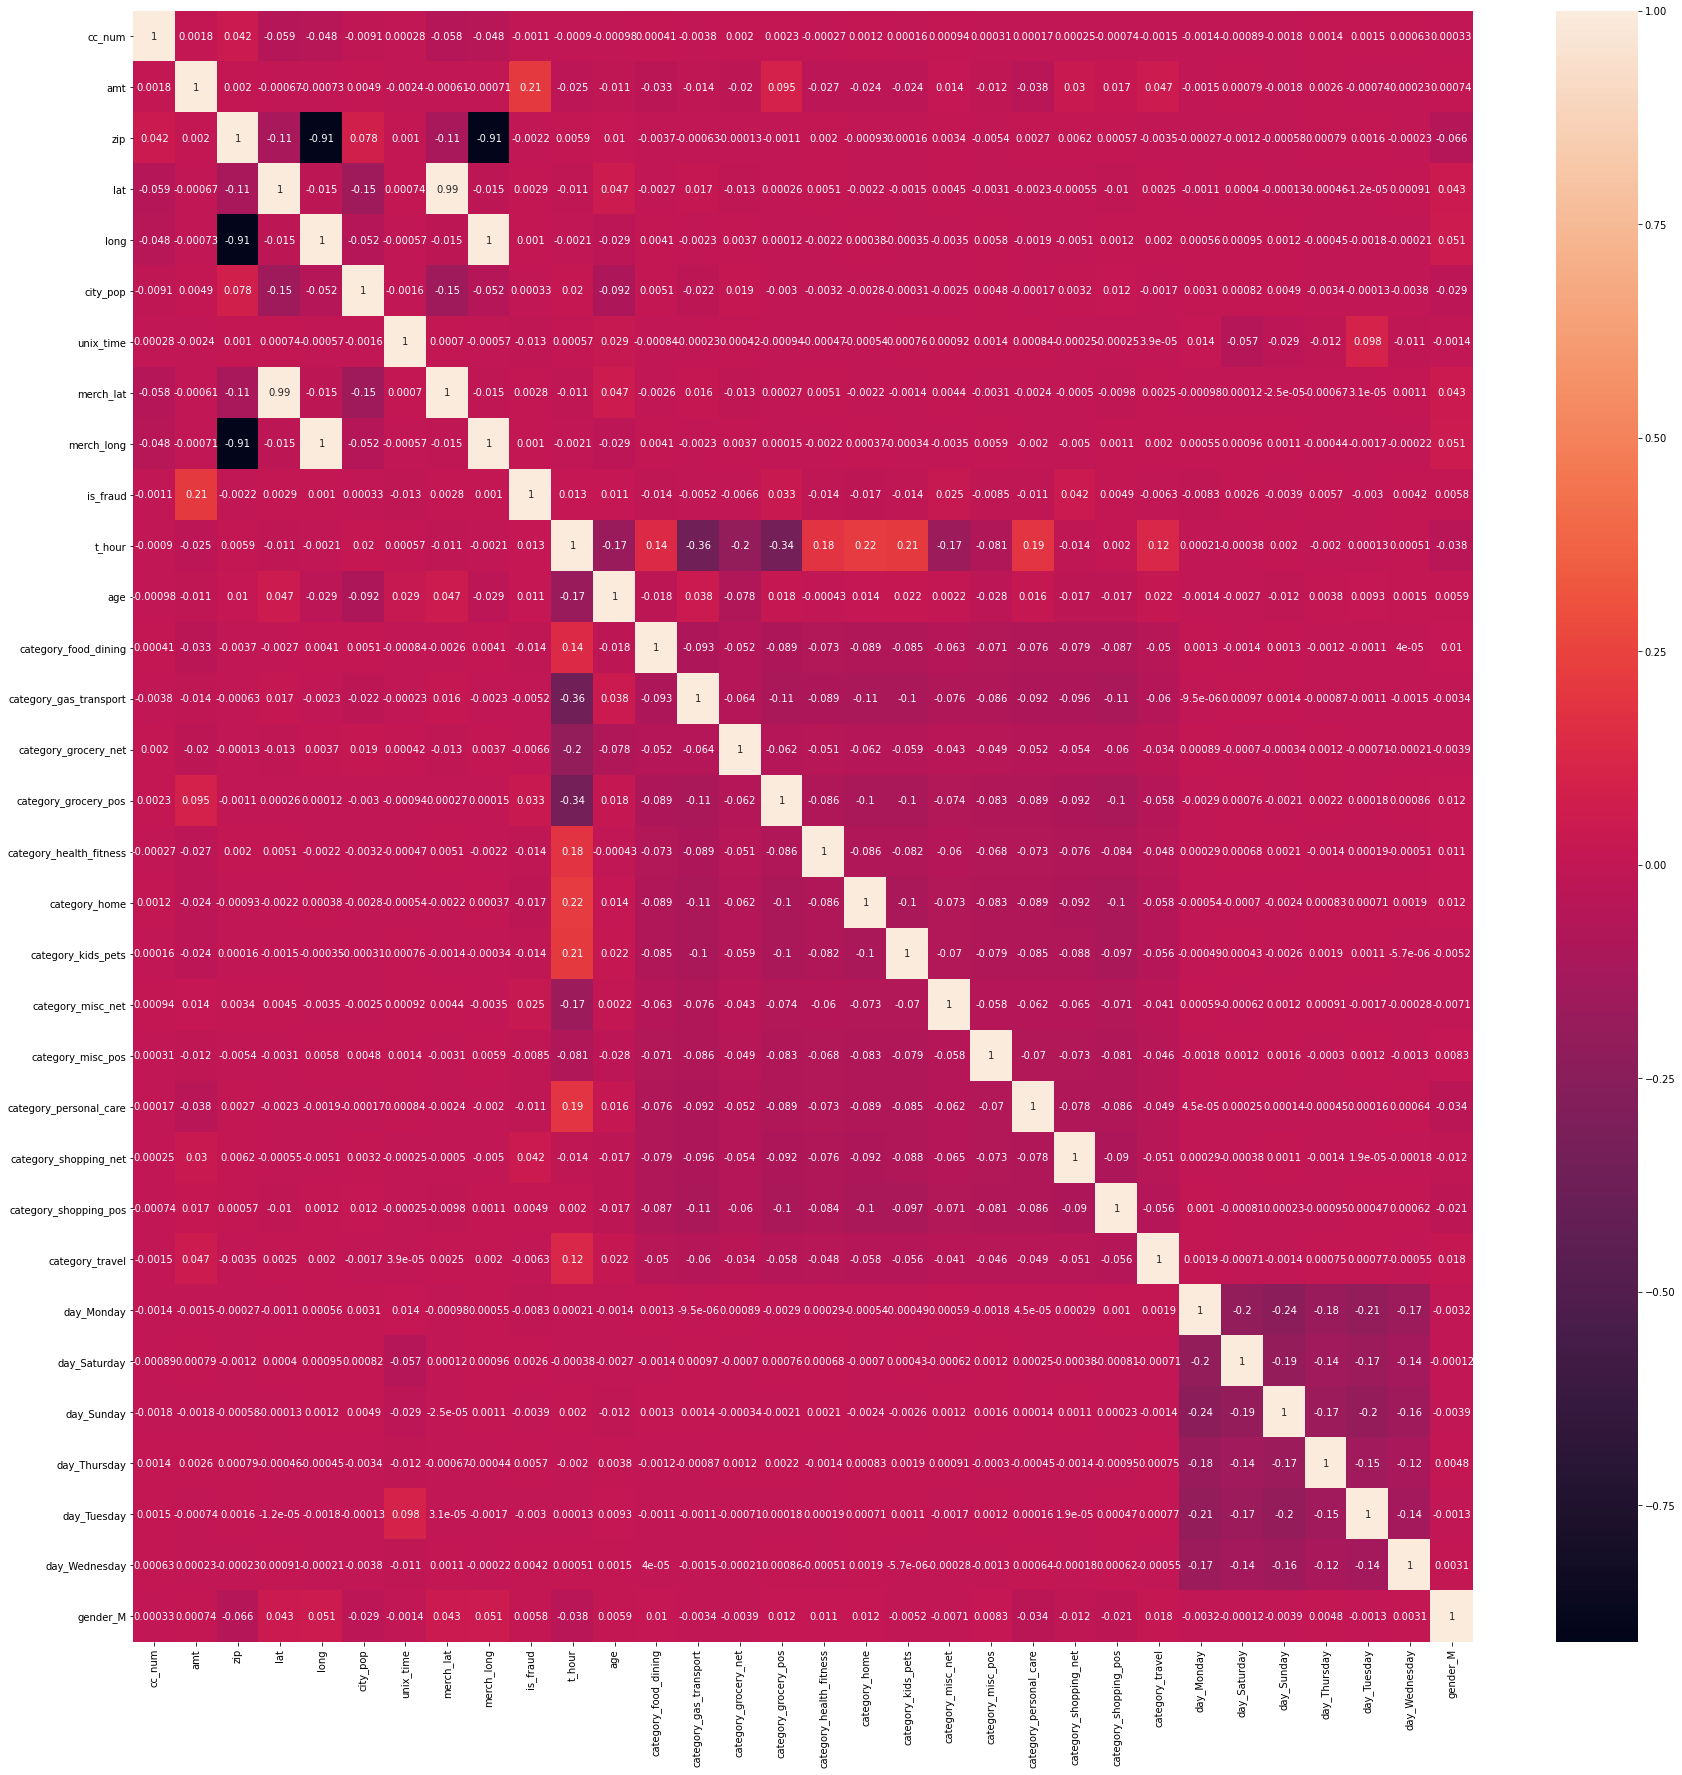

In [97]:
import seaborn as sn
corr = enco_df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sn.heatmap(corr, annot=True)
plt.show()

#### Note:

After checking for Correlation matrix through heat map we could see some variables (lat,log,merc_lat etc) are correlated.
But now let's accept now and furthur we can dig deeper into our solving.

In [98]:
## Target/Class Variable on y
y = enco_df['is_fraud'] 

In [99]:
y.value_counts()  ## Imbalanced Class

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [100]:
enco_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'gender_M'],
      dtype='object')

In [101]:
## Dropping Variables which are not required for Model or ML 

X = enco_df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'first', 'last', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week','month', 'gender','job'], axis=1)

In [102]:
# Split Training Data and Test data at 70:30 Ratio using stratify to have equal distribution of target [is_fraud] variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

In [103]:
# Checking Shape
print(X_train.shape)
print(X_test.shape)

(1296675, 24)
(555719, 24)


In [104]:
## Class variable distribution
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

9651
6756
2895


In [105]:
y_test.value_counts()

0    552824
1      2895
Name: is_fraud, dtype: int64

### Scaling 

#### Note: 
As per our previous observations we could see 'amt' variable has mean at 70 and max at 28000 (appr). So to avoid bigger coffiecents we need to scale the variable

In [106]:
## Using Standard Scaling
X_train[['amt']]=StdScaler.fit_transform(X_train[['amt']])  ## Fitting and transforming on Train data

In [107]:
X_test[['amt']]=StdScaler.transform(X_test[['amt']]) ## Transforming same fit to Test data

In [108]:
X_train.dtypes

amt                        float64
city_pop                     int64
t_hour                       int64
age                          int32
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
day_Monday                   uint8
day_Saturday                 uint8
day_Sunday                   uint8
day_Thursday                 uint8
day_Tuesday                  uint8
day_Wednesday                uint8
gender_M                     uint8
dtype: object

### Handling Skewness if any 
Note: To handle skewness in data using Power Transformer

In [109]:
X_train_1 = pd.DataFrame(Pt.fit_transform(X_train))
X_test_1 = pd.DataFrame(Pt.transform(X_test))

In [110]:
#apply column names after power transformer
X_train_1.columns = X_train.columns
X_test_1.columns = X_test.columns

In [111]:
X_train_1.head()

amt  city_pop    t_hour       age  category_food_dining  \
0  0.390008 -1.478577 -1.292370 -0.430905             -0.275984   
1 -1.222182  0.108484  0.762707 -0.106884             -0.275984   
2 -1.058977  1.660011 -0.395507  2.040571             -0.275984   
3 -1.194213  0.508647  0.619524  1.124241             -0.275984   
4 -0.683724 -1.266772  0.187493  0.299530             -0.275984   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                2.974507             -0.190440             -0.324054   
1               -0.336190             -0.190440             -0.324054   
2               -0.336190             -0.190440             -0.324054   
3               -0.336190             -0.190440             -0.324054   
4               -0.336190             -0.190440             -0.324054   

   category_health_fitness  category_home  category_kids_pets  \
0                -0.266319      -0.323337           -0.309199   
1                -0.266319      -0.323337           -0.309199   
2                -0.266319      -0.323337           -0.309199   
3                -0.266319      -0.323337           -0.309199   
4                -0.266319      -0.323337           -0.309199   

   category_misc_net  category_misc_pos  category_personal_care  \
0          -0.226581          -0.256545               -0.275061   
1          -0.226581           3.897957               -0.275061   
2          -0.226581          -0.256545               -0.275061   
3          -0.226581          -0.256545                3.635561   
4          -0.226581          -0.256545               -0.275061   

   category_shopping_net  category_shopping_pos  category_travel  day_Monday  \
0              -0.284903              -0.313761        -0.179772   -0.499381   
1              -0.284903              -0.313761        -0.179772   -0.499381   
2              -0.284903               3.187137        -0.179772   -0.499381   
3              -0.284903              -0.313761        -0.179772   -0.499381   
4              -0.284903              -0.313761        -0.179772   -0.499381   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0      2.455465   -0.477574     -0.354560    -0.413135      -0.331481   
1     -0.407255   -0.477574     -0.354560    -0.413135      -0.331481   
2     -0.407255   -0.477574     -0.354560    -0.413135       3.016760   
3     -0.407255    2.093916     -0.354560    -0.413135      -0.331481   
4     -0.407255   -0.477574     -0.354560     2.420516      -0.331481   

   gender_M  
0 -0.909560  
1  1.099433  
2 -0.909560  
3  1.099433  
4 -0.909560

In [112]:
X_test_1.head()

amt  city_pop    t_hour       age  category_food_dining  \
0  1.102062  0.108484  0.187493 -0.045729             -0.275984   
1 -1.239528  1.109242 -0.690805 -0.499758             -0.275984   
2 -1.139281 -0.327232  0.762707 -0.570115             -0.275984   
3 -1.147186 -0.874322 -0.839645  0.562790             -0.275984   
4  0.948260  1.458338 -1.446012  0.711692             -0.275984   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0               -0.336190             -0.190440             -0.324054   
1               -0.336190             -0.190440             -0.324054   
2               -0.336190             -0.190440             -0.324054   
3               -0.336190             -0.190440             -0.324054   
4               -0.336190             -0.190440              3.085907   

   category_health_fitness  category_home  category_kids_pets  \
0                 3.754892      -0.323337           -0.309199   
1                -0.266319      -0.323337           -0.309199   
2                -0.266319      -0.323337           -0.309199   
3                -0.266319      -0.323337           -0.309199   
4                -0.266319      -0.323337           -0.309199   

   category_misc_net  category_misc_pos  category_personal_care  \
0          -0.226581          -0.256545               -0.275061   
1          -0.226581           3.897957               -0.275061   
2          -0.226581          -0.256545               -0.275061   
3          -0.226581          -0.256545               -0.275061   
4          -0.226581          -0.256545               -0.275061   

   category_shopping_net  category_shopping_pos  category_travel  day_Monday  \
0              -0.284903              -0.313761        -0.179772   -0.499381   
1              -0.284903              -0.313761        -0.179772    2.002481   
2              -0.284903               3.187137        -0.179772   -0.499381   
3               3.509966              -0.313761        -0.179772    2.002481   
4              -0.284903              -0.313761        -0.179772   -0.499381   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0     -0.407255   -0.477574     -0.354560     2.420516      -0.331481   
1     -0.407255   -0.477574     -0.354560    -0.413135      -0.331481   
2      2.455465   -0.477574     -0.354560    -0.413135      -0.331481   
3     -0.407255   -0.477574     -0.354560    -0.413135      -0.331481   
4     -0.407255   -0.477574     -0.354560    -0.413135      -0.331481   

   gender_M  
0  1.099433  
1 -0.909560  
2 -0.909560  
3 -0.909560  
4  1.099433

In [113]:
X_train = pd.DataFrame(Pt.fit_transform(X_train))
X_test = pd.DataFrame(Pt.transform(X_test))

In [114]:
X_train.columns = X_train_1.columns
X_test.columns = X_test_1.columns

In [115]:
X_train.head()

amt  city_pop    t_hour       age  category_food_dining  \
0  0.390008 -1.478577 -1.292370 -0.430905             -0.275984   
1 -1.222182  0.108484  0.762707 -0.106884             -0.275984   
2 -1.058977  1.660011 -0.395507  2.040571             -0.275984   
3 -1.194213  0.508647  0.619524  1.124241             -0.275984   
4 -0.683724 -1.266772  0.187493  0.299530             -0.275984   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                2.974507             -0.190440             -0.324054   
1               -0.336190             -0.190440             -0.324054   
2               -0.336190             -0.190440             -0.324054   
3               -0.336190             -0.190440             -0.324054   
4               -0.336190             -0.190440             -0.324054   

   category_health_fitness  category_home  category_kids_pets  \
0                -0.266319      -0.323337           -0.309199   
1                -0.266319      -0.323337           -0.309199   
2                -0.266319      -0.323337           -0.309199   
3                -0.266319      -0.323337           -0.309199   
4                -0.266319      -0.323337           -0.309199   

   category_misc_net  category_misc_pos  category_personal_care  \
0          -0.226581          -0.256545               -0.275061   
1          -0.226581           3.897957               -0.275061   
2          -0.226581          -0.256545               -0.275061   
3          -0.226581          -0.256545                3.635561   
4          -0.226581          -0.256545               -0.275061   

   category_shopping_net  category_shopping_pos  category_travel  day_Monday  \
0              -0.284903              -0.313761        -0.179772   -0.499381   
1              -0.284903              -0.313761        -0.179772   -0.499381   
2              -0.284903               3.187137        -0.179772   -0.499381   
3              -0.284903              -0.313761        -0.179772   -0.499381   
4              -0.284903              -0.313761        -0.179772   -0.499381   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0      2.455465   -0.477574     -0.354560    -0.413135      -0.331481   
1     -0.407255   -0.477574     -0.354560    -0.413135      -0.331481   
2     -0.407255   -0.477574     -0.354560    -0.413135       3.016760   
3     -0.407255    2.093916     -0.354560    -0.413135      -0.331481   
4     -0.407255   -0.477574     -0.354560     2.420516      -0.331481   

   gender_M  
0 -0.909560  
1  1.099433  
2 -0.909560  
3  1.099433  
4 -0.909560

In [116]:
X_test.head()

amt  city_pop    t_hour       age  category_food_dining  \
0  1.102062  0.108484  0.187493 -0.045729             -0.275984   
1 -1.239528  1.109242 -0.690805 -0.499758             -0.275984   
2 -1.139281 -0.327232  0.762707 -0.570115             -0.275984   
3 -1.147186 -0.874322 -0.839645  0.562790             -0.275984   
4  0.948260  1.458338 -1.446012  0.711692             -0.275984   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0               -0.336190             -0.190440             -0.324054   
1               -0.336190             -0.190440             -0.324054   
2               -0.336190             -0.190440             -0.324054   
3               -0.336190             -0.190440             -0.324054   
4               -0.336190             -0.190440              3.085907   

   category_health_fitness  category_home  category_kids_pets  \
0                 3.754892      -0.323337           -0.309199   
1                -0.266319      -0.323337           -0.309199   
2                -0.266319      -0.323337           -0.309199   
3                -0.266319      -0.323337           -0.309199   
4                -0.266319      -0.323337           -0.309199   

   category_misc_net  category_misc_pos  category_personal_care  \
0          -0.226581          -0.256545               -0.275061   
1          -0.226581           3.897957               -0.275061   
2          -0.226581          -0.256545               -0.275061   
3          -0.226581          -0.256545               -0.275061   
4          -0.226581          -0.256545               -0.275061   

   category_shopping_net  category_shopping_pos  category_travel  day_Monday  \
0              -0.284903              -0.313761        -0.179772   -0.499381   
1              -0.284903              -0.313761        -0.179772    2.002481   
2              -0.284903               3.187137        -0.179772   -0.499381   
3               3.509966              -0.313761        -0.179772    2.002481   
4              -0.284903              -0.313761        -0.179772   -0.499381   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0     -0.407255   -0.477574     -0.354560     2.420516      -0.331481   
1     -0.407255   -0.477574     -0.354560    -0.413135      -0.331481   
2      2.455465   -0.477574     -0.354560    -0.413135      -0.331481   
3     -0.407255   -0.477574     -0.354560    -0.413135      -0.331481   
4     -0.407255   -0.477574     -0.354560    -0.413135      -0.331481   

   gender_M  
0  1.099433  
1 -0.909560  
2 -0.909560  
3 -0.909560  
4  1.099433

### Functions to use roc curve,ploting for it and score etc.

In [117]:
# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
    

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 3, scoring=scoring)
    return np.mean(xval)

In [118]:
def PrintModelResults(Name,ytest,ypred,false_positive_rate, true_positive_rate, threshold):
    print('='*30)
    print(Name)
    print('='*30)
    # Calculate average precision 
    average_precision = average_precision_score(y_test, y_predicted)
    
    roc_auc = roc_auc_score(y_test, probs[:, 1])
    
    # Obtain precision and recall 
    precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

    print('ROC AUC Score:',roc_auc)

    print('Classification report:\n', classification_report(ytest, ypred))
    print('Confusion matrix:\n', confusion_matrix(y_true = ytest, y_pred = ypred))

    print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(ypred , ytest)))
    
    print("F1 Score: {}".format(f1_score(y_true = ytest, y_pred = ypred)))

    print("Recall score: {}".format(recall_score(y_true = ytest, y_pred = ypred)))

    print("Precision score: {}".format(precision_score(y_true = ytest, y_pred = ypred)))

    # Plot the roc curve 
    plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

    # Plot recall precision curve
    plot_pr_curve(recall, precision, average_precision)
    print('='*50)

## Models on Imabalanced data

### Model 1: Logistic Regression (LR)

In [119]:
# Fit a logistic regression model to our data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Obtain model predictions
y_train_predicted = model.predict(X_train)
y_predicted = model.predict(X_test)


Evalution

Logistic Regression Classifier: 
ROC AUC Score: 0.8352492057299662
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    552824
           1       1.00      0.03      0.06      2895

    accuracy                           0.99    555719
   macro avg       1.00      0.51      0.53    555719
weighted avg       0.99      0.99      0.99    555719

Confusion matrix:
 [[552824      0]
 [  2809     86]]
Accuracy :0.99495
F1 Score: 0.05769875880576988
Recall score: 0.029706390328151987
Precision score: 1.0


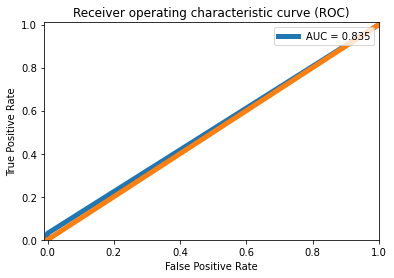

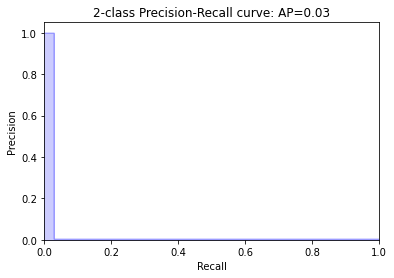

In [120]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)

PrintModelResults("Logistic Regression Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)


In [121]:

# Define the parameter sets to test
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],'max_iter':[50,150,300]}


# Define the model to use
model = LogisticRegression(random_state=5)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=kfolds.split(X_train,y_train), scoring='recall', n_jobs=-1,verbose=1, return_train_score=True)
CV_model.fit(X_train, y_train)
print(CV_model.best_params_)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
{'C': 1, 'max_iter': 50, 'penalty': 'l2'}


Logistic Regression with Best parameters:
ROC AUC Score: 0.8352492057299662
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    552824
           1       1.00      0.03      0.06      2895

    accuracy                           0.99    555719
   macro avg       1.00      0.51      0.53    555719
weighted avg       0.99      0.99      0.99    555719

Confusion matrix:
 [[552824      0]
 [  2809     86]]
Accuracy :0.99495
F1 Score: 0.05769875880576988
Recall score: 0.029706390328151987
Precision score: 1.0


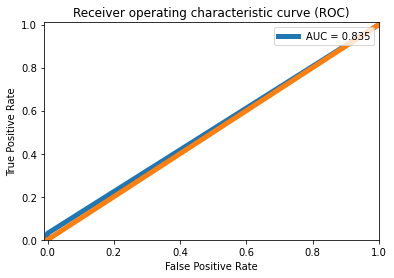

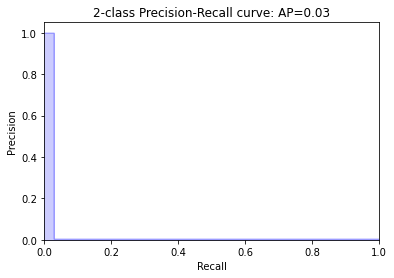

In [122]:
# Build a Logestic Regression using the GridSearchCV parameters
model = LogisticRegression(C= 1, penalty= 'l2',max_iter=50)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_train_predicted = model.predict(X_train)
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Logistic Regression with Best parameters:",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

# Module 2: Decision Tree Classifier

Decision Tree Classifier: 
ROC AUC Score: 0.8352492057299662
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.80      0.82      0.81      2895

    accuracy                           1.00    555719
   macro avg       0.90      0.91      0.90    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[552222    602]
 [   534   2361]]
Accuracy :0.99796
F1 Score: 0.806077159440082
Recall score: 0.8155440414507772
Precision score: 0.7968275396557543


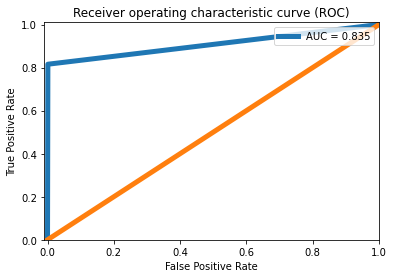

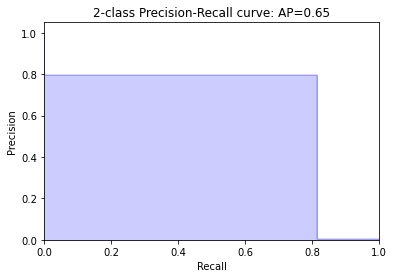

In [123]:
# Fit a Decission Tree  model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Decision Tree Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## To find optimal parameters for Decision Tree Classifier:

In [124]:
# Decision Tree Classifier

# Define the parameter sets to test
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,8,1)), 
              "min_samples_leaf": list(range(5,7,1))}

# Define the model to use
model = DecisionTreeClassifier(random_state=5)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=kfolds.split(X_train,y_train), scoring='recall', n_jobs=-1,verbose=1, return_train_score=True)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
print(CV_model.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}


## Model results

Decision Tree Classifier with best parameters: 
ROC AUC Score: 0.8352492057299662
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.95      0.75      0.84      2895

    accuracy                           1.00    555719
   macro avg       0.97      0.88      0.92    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[552700    124]
 [   717   2178]]
Accuracy :0.99849
F1 Score: 0.8381758706946315
Recall score: 0.7523316062176166
Precision score: 0.946133796698523


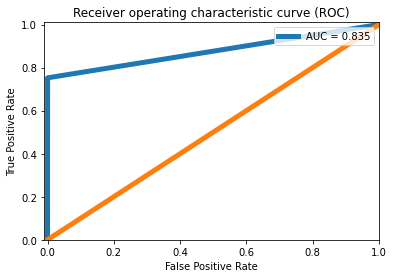

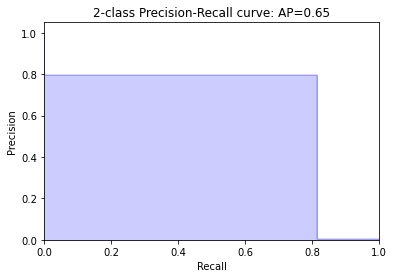

In [125]:
# Build a DecisionTreeClassifier using the GridSearchCV parameters
DT_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 5)

# Fit the model to your training data and get the predicted results
DT_model.fit(X_train,y_train)
y_predicted_DT = DT_model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted_DT)

PrintModelResults("Decision Tree Classifier with best parameters: ",y_test, y_predicted_DT,false_positive_rate, true_positive_rate, threshold)

## Model 3: Random Forest 

Random Forest Classifier: 
ROC AUC Score: 0.9856597718626674
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.96      0.78      0.86      2895

    accuracy                           1.00    555719
   macro avg       0.98      0.89      0.93    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[552741     83]
 [   646   2249]]
Accuracy :0.99869
F1 Score: 0.8605318538358523
Recall score: 0.7768566493955095
Precision score: 0.9644082332761578


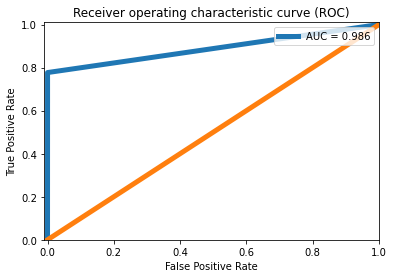

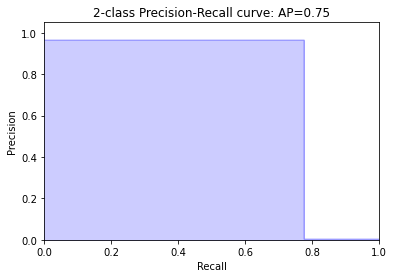

In [126]:
# Fit a Random Forest model to our data
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Random Forest Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## To find optimal parameters for Random Forest Classifier

In [127]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=kfolds.split(X_train,y_train), scoring='recall', n_jobs=-1,verbose=1, return_train_score=True)

#Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
print(CV_model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 1}


## Model results:

Random Forest Classifier with best parameters: 
ROC AUC Score: 0.9856597718626674
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.89      0.54      0.68      2895

    accuracy                           1.00    555719
   macro avg       0.94      0.77      0.84    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[552627    197]
 [  1319   1576]]
Accuracy :0.99727
F1 Score: 0.675235646958012
Recall score: 0.5443868739205526
Precision score: 0.8888888888888888


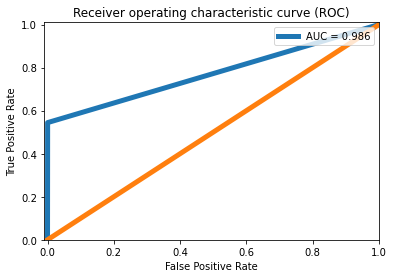

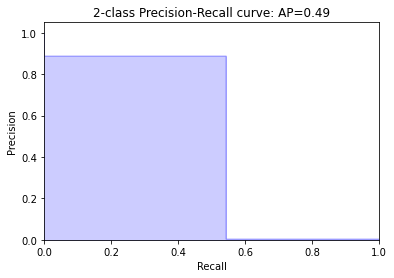

In [128]:
# Build a RandomForestClassifier using the GridSearchCV parameters
model = RandomForestClassifier(bootstrap=True,
                               
                               criterion = 'gini',
                               n_estimators = 1,
                               max_features = 'auto',
                               min_samples_leaf = 5,
                               max_depth = 8,
                               n_jobs = -1,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Random Forest Classifier with best parameters: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## Model 4: XB Booster

[21:58:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

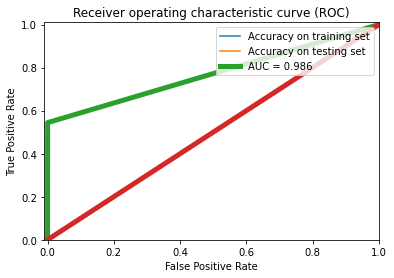

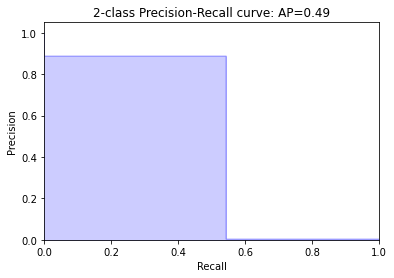

In [129]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of class in XGboost')
plt.ylabel('Accuracy')
plt.legend()


# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XG Boost: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

[21:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 
ROC AUC Score: 0.9856597718626674
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.89      0.54      0.68      2895

    accuracy                           1.00    555719
   macro avg       0.94      0.77      0.84    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[552627    197]
 [  1319   1576]]
Accuracy :0.99727
F1 Score: 0.675235646958012
Recall score: 0.5443868739205526
Precision score: 0.8888888888888888


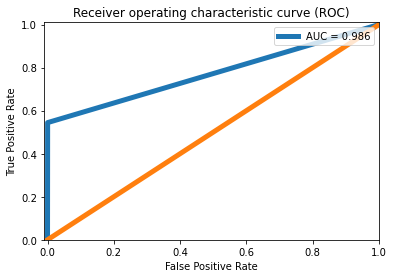

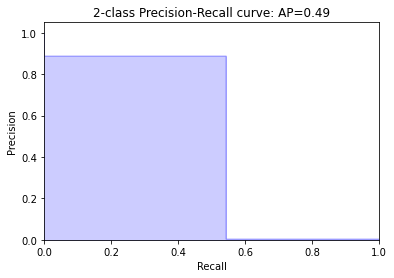

In [130]:
xgb=XGBClassifier(n_estimators=25)
xgb.fit(X_train,y_train)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XGBoost: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## To find optimal parameters for XGBoost:

In [131]:


# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

# Define the model to use
model = XGBClassifier(n_estimators=25)

kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=kfolds.split(X_train,y_train), scoring='recall', n_jobs=-1,verbose=1, return_train_score=True)
  # Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
print(CV_model.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[22:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'learning_rate': 0.6, 'subsample': 0.9}


## Model results:

[22:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost with best parameters: 
ROC AUC Score: 0.9856597718626674
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.96      0.82      0.88      2895

    accuracy                           1.00    555

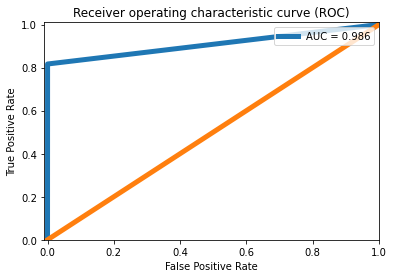

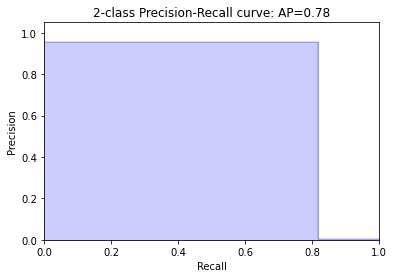

In [132]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}
model=XGBClassifier(params = params)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XG Boost with best parameters: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

### Choosing best model on the imbalanced data

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, Random Forest), almost all of them have performed well. 

But as we have to choose one of them, we can go for the best as `Decission Tree` which gives the maximum ROC AUC score of 99.9%

In [133]:
var_imp = []
for i in DT_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(DT_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(DT_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(DT_model.feature_importances_)[-3])+1)

Top var = 1
2nd Top var = 8
3rd Top var = 3


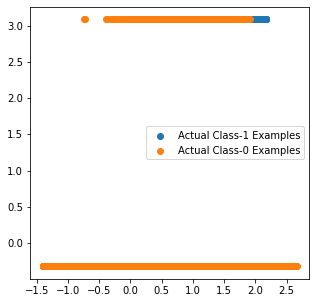

In [134]:
top_var_index = var_imp.index(np.sort(DT_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(DT_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

### Historic Variables Derivation

In [135]:
enco_df.index = pd.to_datetime(enco_df['trans_date_trans_time'])
enco_df = enco_df.rename_axis(index={'trans_date_trans_time': 'time_stamp'})

In [136]:
enco_df.head()

trans_date_trans_time            cc_num  \
time_stamp                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_stamp                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                           amt      first     last gender  \
time_stamp                                                  
2019-01-01 00:00:18   4.970000   Jennifer    Banks      F   
2019-01-01 00:00:44 107.230000  Stephanie     Gill      F   
2019-01-01 00:00:51 220.110000     Edward  Sanchez      M   
2019-01-01 00:01:16  45.000000     Jeremy    White      M   
2019-01-01 00:03:06  41.960000      Tyler   Garcia      M   

                                           street            city state  \
time_stamp                                                                
2019-01-01 00:00:18                561 Perry Cove  Moravian Falls    NC   
2019-01-01 00:00:44  43039 Riley Greens Suite 393          Orient    WA   
2019-01-01 00:00:51      594 White Dale Suite 530      Malad City    ID   
2019-01-01 00:01:16   9443 Cynthia Court Apt. 038         Boulder    MT   
2019-01-01 00:03:06              408 Bradley Rest        Doe Hill    VA   

                       zip       lat        long  city_pop  \
time_stamp                                                   
2019-01-01 00:00:18  28654 36.078800  -81.178100      3495   
2019-01-01 00:00:44  99160 48.887800 -118.210500       149   
2019-01-01 00:00:51  83252 42.180800 -112.262000      4154   
2019-01-01 00:01:16  59632 46.230600 -112.113800      1939   
2019-01-01 00:03:06  24433 38.420700  -79.462900        99   

                                                   job        dob  \
time_stamp                                                          
2019-01-01 00:00:18          Psychologist, counselling 1988-03-09   
2019-01-01 00:00:44  Special educational needs teacher 1978-06-21   
2019-01-01 00:00:51        Nature conservation officer 1962-01-19   
2019-01-01 00:01:16                    Patent attorney 1967-01-12   
2019-01-01 00:03:06     Dance movement psychotherapist 1986-03-28   

                                            trans_num   unix_time  merch_lat  \
time_stamp                                                                     
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018  36.011293   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

                     merch_long  is_fraud year_month day_of_week  t_hour  \
time_stamp                                                                 
2019-01-01 00:00:18  -82.048315         0    2019-01     Tuesday       0   
2019-01-01 00:00:44 -118.186462         0    2019-01     Tuesday       0   
2019-01-01 00:00:51 -112.154481         0    2019-01     Tuesday       0   
2019-01-01 00:01:16 -112.561071         0    2019-01     Tuesday       0   
2019-01-01 00:03:06  -78.632459         0    2019-01     Tuesday       0   

                       month  age  category_food_dining  \
time_stamp                       

In [137]:
enco_df.shape

(1852394, 47)

In [138]:
enco_df['flag_aggregation'] = 1

#### Quarterly Trasactions - Customer

In [139]:
df_hist_trans_90d = \
    enco_df \
    .groupby(['cc_num'])['flag_aggregation']\
    .rolling('90D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

In [140]:
df_hist_trans_90d.head()

cc_num          time_stamp  flag_aggregation
0  60416207185 2019-01-01 12:47:15          0.000000
1  60416207185 2019-01-02 08:44:57          1.000000
2  60416207185 2019-01-02 08:47:36          2.000000
3  60416207185 2019-01-02 12:38:14          3.000000
4  60416207185 2019-01-02 13:10:46          4.000000

In [141]:
df_hist_trans_90d.shape

(1852394, 3)

In [142]:
df_hist_trans_90d['time_stamp'] = df_hist_trans_90d['time_stamp'].dt.date

In [143]:
df_hist_trans_90d.tail()

cc_num  time_stamp  flag_aggregation
1852389  4992346398065154184  2020-12-31        426.000000
1852390  4992346398065154184  2020-12-31        427.000000
1852391  4992346398065154184  2020-12-31        426.000000
1852392  4992346398065154184  2020-12-31        426.000000
1852393  4992346398065154184  2020-12-31        427.000000

In [144]:
df_hist_trans_90d.columns = ['cc_num','tr_date','quart_transac']

In [145]:
df_hist_trans_90d.shape

(1852394, 3)

In [146]:
## Getting at least 1 transaction per quarter per customer
df_hist_trans_90d = df_hist_trans_90d.groupby(['cc_num','tr_date'])['quart_transac'].min().reset_index()

In [147]:
enco_df.head()

trans_date_trans_time            cc_num  \
time_stamp                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_stamp                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                           amt      first     last gender  \
time_stamp                                                  
2019-01-01 00:00:18   4.970000   Jennifer    Banks      F   
2019-01-01 00:00:44 107.230000  Stephanie     Gill      F   
2019-01-01 00:00:51 220.110000     Edward  Sanchez      M   
2019-01-01 00:01:16  45.000000     Jeremy    White      M   
2019-01-01 00:03:06  41.960000      Tyler   Garcia      M   

                                           street            city state  \
time_stamp                                                                
2019-01-01 00:00:18                561 Perry Cove  Moravian Falls    NC   
2019-01-01 00:00:44  43039 Riley Greens Suite 393          Orient    WA   
2019-01-01 00:00:51      594 White Dale Suite 530      Malad City    ID   
2019-01-01 00:01:16   9443 Cynthia Court Apt. 038         Boulder    MT   
2019-01-01 00:03:06              408 Bradley Rest        Doe Hill    VA   

                       zip       lat        long  city_pop  \
time_stamp                                                   
2019-01-01 00:00:18  28654 36.078800  -81.178100      3495   
2019-01-01 00:00:44  99160 48.887800 -118.210500       149   
2019-01-01 00:00:51  83252 42.180800 -112.262000      4154   
2019-01-01 00:01:16  59632 46.230600 -112.113800      1939   
2019-01-01 00:03:06  24433 38.420700  -79.462900        99   

                                                   job        dob  \
time_stamp                                                          
2019-01-01 00:00:18          Psychologist, counselling 1988-03-09   
2019-01-01 00:00:44  Special educational needs teacher 1978-06-21   
2019-01-01 00:00:51        Nature conservation officer 1962-01-19   
2019-01-01 00:01:16                    Patent attorney 1967-01-12   
2019-01-01 00:03:06     Dance movement psychotherapist 1986-03-28   

                                            trans_num   unix_time  merch_lat  \
time_stamp                                                                     
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018  36.011293   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

                     merch_long  is_fraud year_month day_of_week  t_hour  \
time_stamp                                                                 
2019-01-01 00:00:18  -82.048315         0    2019-01     Tuesday       0   
2019-01-01 00:00:44 -118.186462         0    2019-01     Tuesday       0   
2019-01-01 00:00:51 -112.154481         0    2019-01     Tuesday       0   
2019-01-01 00:01:16 -112.561071         0    2019-01     Tuesday       0   
2019-01-01 00:03:06  -78.632459         0    2019-01     Tuesday       0   

                       month  age  category_food_dining  \
time_stamp                       

In [148]:
enco_df['tr_date'] = enco_df.trans_date_trans_time.dt.date

In [149]:
final_df = enco_df.merge(df_hist_trans_90d,left_on = ['cc_num','tr_date'], \
          right_on = ['cc_num','tr_date'],how = 'left')

In [150]:
final_df.shape

(1852394, 50)

#### Historic 24 H Trasactions

In [151]:
df_hist_orders_24h = \
    enco_df \
    .groupby(['cc_num'])['flag_aggregation']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [152]:
df_hist_orders_24h.head()

cc_num trans_date_trans_time  hist_trans_24h
0  60416207185   2019-01-01 12:47:15        0.000000
1  60416207185   2019-01-02 08:44:57        1.000000
2  60416207185   2019-01-02 08:47:36        2.000000
3  60416207185   2019-01-02 12:38:14        3.000000
4  60416207185   2019-01-02 13:10:46        4.000000

##### 24 hrs fraud historic transactions

In [153]:
df_hist_trans_fraud_24h = \
    enco_df[enco_df['is_fraud']== 1]\
    .groupby(['cc_num'])['flag_aggregation']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

In [154]:
df_hist_trans_fraud_24h.head()

cc_num          time_stamp  flag_aggregation
0  60416207185 2019-03-01 01:32:53          0.000000
1  60416207185 2019-03-01 02:42:25          1.000000
2  60416207185 2019-03-01 23:06:58          2.000000
3  60416207185 2019-03-02 22:10:38          3.000000
4  60416207185 2019-03-02 22:10:59          2.000000

In [155]:
df_hist_trans_fraud_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_fraud_24h']

In [156]:
df_hist_trans_fraud_24h.head()

cc_num trans_date_trans_time  hist_trans_fraud_24h
0  60416207185   2019-03-01 01:32:53              0.000000
1  60416207185   2019-03-01 02:42:25              1.000000
2  60416207185   2019-03-01 23:06:58              2.000000
3  60416207185   2019-03-02 22:10:38              3.000000
4  60416207185   2019-03-02 22:10:59              2.000000

In [157]:
df_hist_trans_fraud_24h.shape

(9651, 3)

In [158]:
final_df = final_df.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

In [159]:
final_df = final_df.merge(df_hist_trans_fraud_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')


In [160]:
final_df.shape

(1852482, 52)

In [161]:
final_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'gender_M', 'flag_aggregation',
       'tr_date', 'quart_transac', 'hist_trans_24h', 'hist_trans_fraud_24h'],
      dtype='object')

In [162]:
final_df.isnull().sum().sort_values(ascending=False)

hist_trans_fraud_24h       1842831
hist_trans_24h                   0
day_of_week                      0
year_month                       0
is_fraud                         0
merch_long                       0
merch_lat                        0
unix_time                        0
trans_num                        0
dob                              0
job                              0
city_pop                         0
long                             0
lat                              0
zip                              0
state                            0
city                             0
street                           0
gender                           0
last                             0
first                            0
amt                              0
category                         0
merchant                         0
cc_num                           0
t_hour                           0
month                            0
age                              0
category_travel     

In [163]:
final_df[['hist_trans_fraud_24h']]= \
 final_df[['hist_trans_fraud_24h']].fillna(0)

In [164]:
final_df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
category                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
year_month                 0
day_of_week                0
t_hour                     0
month                      0
age                        0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_

In [165]:
final_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'gender_M', 'flag_aggregation',
       'tr_date', 'quart_transac', 'hist_trans_24h', 'hist_trans_fraud_24h'],
      dtype='object')

In [166]:
cols_list = list(final_df.columns)

In [167]:
cols_list

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'year_month',
 'day_of_week',
 't_hour',
 'month',
 'age',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday',
 'gender_M',
 'flag_aggregation',
 'tr_date',
 'quart_transac',
 'hist_trans_24h',
 'hist_trans_fraud_24h']

In [168]:
final_df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job        dob  \
0  -81.178100      3495          Psychologist, counselling 1988-03-09   
1 -118.210500       149  Special educational needs teacher 1978-06-21   
2 -112.262000      4154        Nature conservation officer 1962-01-19   
3 -112.113800      1939                    Patent attorney 1967-01-12   
4  -79.462900        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud year_month day_of_week  t_hour    month  age  \
0         0    2019-01     Tuesday       0  January   31   
1         0    2019-01     Tuesday       0  January   41   
2         0    2019-01     Tuesday       0  January   57   
3         0    2019-01     Tuesday       0  January   52   
4         0    2019-01     Tuesday       0  January   33   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0     

### Derieve Distance from Co-ordinte Variables

From Haversine Function it is easy to calculate the distance between co-ordinates(lat,log)

It is essential to analysis how much distance fom merchant and customers, the transactions are happening and if it is more distance from custome location we could easily predict the suspious transaction 

In [169]:
def dist_between_c_and_m(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=3963):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [170]:
final_df['distance_c_and_m'] = \
    dist_between_c_and_m(final_df['lat'],final_df['long'],final_df['merch_lat'],final_df['merch_long'])

In [171]:
final_df.distance_c_and_m.head()

0   48.890624
1   18.793102
2   67.308226
3   59.512324
4   48.243192
Name: distance_c_and_m, dtype: float64

In [172]:
final_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'gender_M', 'flag_aggregation',
       'tr_date', 'quart_transac', 'hist_trans_24h', 'hist_trans_fraud_24h',
       'distance_c_and_m'],
      dtype='object')

### Train - Test Split

In [173]:
## Target/Class Variable on y
y = final_df['is_fraud'] 

In [174]:
y.value_counts()  ## Imbalanced Class

0    1842831
1       9651
Name: is_fraud, dtype: int64

In [175]:
final_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week', 't_hour',
       'month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'gender_M', 'flag_aggregation',
       'tr_date', 'quart_transac', 'hist_trans_24h', 'hist_trans_fraud_24h',
       'distance_c_and_m'],
      dtype='object')

In [176]:
## Dropping Variables which are not required for Model or ML 

X = final_df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'first', 'last', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week','month', 'gender','job','flag_aggregation','tr_date','hist_trans_24h'], axis=1)

In [177]:
# Split Training Data and Test data at 70:30 Ratio using stratify to have equal distribution of target [is_fraud] variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

In [178]:
# Checking Shape
print(X_train.shape)
print(X_test.shape)

(1296737, 27)
(555745, 27)


In [179]:
## Class variable distribution
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

9651
6756
2895


In [180]:
y_test.value_counts()

0    552850
1      2895
Name: is_fraud, dtype: int64

### Scaling 

#### Note: 
As per our previous observations we could see 'amt' variable has mean at 70 and max at 28000 (appr). So to avoid bigger coffiecents we need to scale the variable

In [181]:
## Using Standard Scaling
X_train[['amt']]=StdScaler.fit_transform(X_train[['amt']])  ## Fitting and transforming on Train data

In [182]:
X_test[['amt']]=StdScaler.transform(X_test[['amt']]) ## Transforming same fit to Test data

In [183]:
X_train.dtypes

amt                        float64
city_pop                     int64
t_hour                       int64
age                          int32
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
day_Monday                   uint8
day_Saturday                 uint8
day_Sunday                   uint8
day_Thursday                 uint8
day_Tuesday                  uint8
day_Wednesday                uint8
gender_M                     uint8
quart_transac              float64
hist_trans_fraud_24h       float64
distance_c_and_m           float64
dtype: object

### Handling Skewness if any 
Note: To handle skewness in data using Power Transformer

In [184]:
X_train_1 = pd.DataFrame(Pt.fit_transform(X_train))
X_test_1 = pd.DataFrame(Pt.transform(X_test))

In [185]:
#apply column names after power transformer
X_train_1.columns = X_train.columns
X_test_1.columns = X_test.columns

In [186]:
X_train_1.head()

amt  city_pop    t_hour       age  category_food_dining  \
0  0.290490 -0.717782 -1.922548  1.124211             -0.275486   
1  1.139112  0.215796  1.048010 -1.197186              3.629942   
2  0.157243  0.271627 -1.760158  0.759798              3.629942   
3  1.114717 -0.117593 -1.760158 -1.285313             -0.275486   
4 -1.323523 -1.835550  0.905520  0.131097             -0.275486   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                2.973003             -0.190578             -0.324191   
1               -0.336360             -0.190578             -0.324191   
2               -0.336360             -0.190578             -0.324191   
3               -0.336360             -0.190578              3.084606   
4               -0.336360             -0.190578             -0.324191   

   category_health_fitness  category_home  category_kids_pets  \
0                -0.266106      -0.323461           -0.308691   
1                -0.266106      -0.323461           -0.308691   
2                -0.266106      -0.323461           -0.308691   
3                -0.266106      -0.323461           -0.308691   
4                -0.266106      -0.323461           -0.308691   

   category_misc_net  category_misc_pos  category_personal_care  \
0          -0.226718          -0.256051               -0.274693   
1          -0.226718          -0.256051               -0.274693   
2          -0.226718          -0.256051               -0.274693   
3          -0.226718          -0.256051               -0.274693   
4          -0.226718          -0.256051                3.640423   

   category_shopping_net  category_shopping_pos  category_travel  day_Monday  \
0              -0.286022              -0.314401        -0.180014   -0.499539   
1              -0.286022              -0.314401        -0.180014   -0.499539   
2              -0.286022              -0.314401        -0.180014    2.001845   
3              -0.286022              -0.314401        -0.180014   -0.499539   
4              -0.286022              -0.314401        -0.180014   -0.499539   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0     -0.407334    2.094549     -0.354558    -0.413120      -0.331531   
1     -0.407334   -0.477430      2.820416    -0.413120      -0.331531   
2     -0.407334   -0.477430     -0.354558    -0.413120      -0.331531   
3     -0.407334    2.094549     -0.354558    -0.413120      -0.331531   
4     -0.407334   -0.477430     -0.354558     2.420607      -0.331531   

   gender_M  quart_transac  hist_trans_fraud_24h  distance_c_and_m  
0  1.100894       0.353767             -0.072369          0.323148  
1 -0.908353       1.565157             -0.072369          0.320907  
2 -0.908353      -0.058735             -0.072369          2.072345  
3  1.100894       0.457120             -0.072369          2.066677  
4 -0.908353      -0.011114             -0.072369         -1.496663

In [187]:
X_test_1.head()

amt  city_pop    t_hour       age  category_food_dining  \
0  1.045135  0.193712 -1.446357  0.900821             -0.275486   
1 -0.179838 -0.332837 -0.395778 -1.285313             -0.275486   
2 -1.093153 -0.137946  1.331998  1.455433             -0.275486   
3 -1.157138  1.836595 -1.292719  0.711519             -0.275486   
4  2.247413 -0.756668  0.619457  0.073123             -0.275486   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0               -0.336360             -0.190578              3.084606   
1               -0.336360             -0.190578             -0.324191   
2               -0.336360             -0.190578             -0.324191   
3               -0.336360             -0.190578             -0.324191   
4               -0.336360             -0.190578             -0.324191   

   category_health_fitness  category_home  category_kids_pets  \
0                -0.266106      -0.323461           -0.308691   
1                -0.266106      -0.323461           -0.308691   
2                -0.266106      -0.323461            3.239485   
3                -0.266106      -0.323461           -0.308691   
4                -0.266106      -0.323461           -0.308691   

   category_misc_net  category_misc_pos  category_personal_care  \
0          -0.226718          -0.256051               -0.274693   
1          -0.226718           3.905469               -0.274693   
2          -0.226718          -0.256051               -0.274693   
3          -0.226718           3.905469               -0.274693   
4          -0.226718          -0.256051               -0.274693   

   category_shopping_net  category_shopping_pos  category_travel  day_Monday  \
0              -0.286022              -0.314401        -0.180014   -0.499539   
1              -0.286022              -0.314401        -0.180014   -0.499539   
2              -0.286022              -0.314401        -0.180014    2.001845   
3              -0.286022              -0.314401        -0.180014    2.001845   
4              -0.286022              -0.314401         5.555114   -0.499539   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0     -0.407334   -0.477430     -0.354558    -0.413120       3.016305   
1     -0.407334   -0.477430      2.820416    -0.413120      -0.331531   
2     -0.407334   -0.477430     -0.354558    -0.413120      -0.331531   
3     -0.407334   -0.477430     -0.354558    -0.413120      -0.331531   
4     -0.407334    2.094549     -0.354558    -0.413120      -0.331531   

   gender_M  quart_transac  hist_trans_fraud_24h  distance_c_and_m  
0 -0.908353       0.103369             -0.072369          1.197221  
1  1.100894      -0.358076             -0.072369          0.128950  
2  1.100894       0.616369             -0.072369          1.461314  
3  1.100894      -0.701072             -0.072369         -1.753353  
4  1.100894      -0.294389             -0.072369          0.539229

In [188]:
X_train = pd.DataFrame(Pt.fit_transform(X_train))
X_test = pd.DataFrame(Pt.transform(X_test))

In [189]:
X_train.columns = X_train_1.columns
X_test.columns = X_test_1.columns

In [190]:
X_train.head()

amt  city_pop    t_hour       age  category_food_dining  \
0  0.290490 -0.717782 -1.922548  1.124211             -0.275486   
1  1.139112  0.215796  1.048010 -1.197186              3.629942   
2  0.157243  0.271627 -1.760158  0.759798              3.629942   
3  1.114717 -0.117593 -1.760158 -1.285313             -0.275486   
4 -1.323523 -1.835550  0.905520  0.131097             -0.275486   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                2.973003             -0.190578             -0.324191   
1               -0.336360             -0.190578             -0.324191   
2               -0.336360             -0.190578             -0.324191   
3               -0.336360             -0.190578              3.084606   
4               -0.336360             -0.190578             -0.324191   

   category_health_fitness  category_home  category_kids_pets  \
0                -0.266106      -0.323461           -0.308691   
1                -0.266106      -0.323461           -0.308691   
2                -0.266106      -0.323461           -0.308691   
3                -0.266106      -0.323461           -0.308691   
4                -0.266106      -0.323461           -0.308691   

   category_misc_net  category_misc_pos  category_personal_care  \
0          -0.226718          -0.256051               -0.274693   
1          -0.226718          -0.256051               -0.274693   
2          -0.226718          -0.256051               -0.274693   
3          -0.226718          -0.256051               -0.274693   
4          -0.226718          -0.256051                3.640423   

   category_shopping_net  category_shopping_pos  category_travel  day_Monday  \
0              -0.286022              -0.314401        -0.180014   -0.499539   
1              -0.286022              -0.314401        -0.180014   -0.499539   
2              -0.286022              -0.314401        -0.180014    2.001845   
3              -0.286022              -0.314401        -0.180014   -0.499539   
4              -0.286022              -0.314401        -0.180014   -0.499539   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0     -0.407334    2.094549     -0.354558    -0.413120      -0.331531   
1     -0.407334   -0.477430      2.820416    -0.413120      -0.331531   
2     -0.407334   -0.477430     -0.354558    -0.413120      -0.331531   
3     -0.407334    2.094549     -0.354558    -0.413120      -0.331531   
4     -0.407334   -0.477430     -0.354558     2.420607      -0.331531   

   gender_M  quart_transac  hist_trans_fraud_24h  distance_c_and_m  
0  1.100894       0.353767             -0.072369          0.323148  
1 -0.908353       1.565157             -0.072369          0.320907  
2 -0.908353      -0.058735             -0.072369          2.072345  
3  1.100894       0.457120             -0.072369          2.066677  
4 -0.908353      -0.011114             -0.072369         -1.496663

In [191]:
X_test.head()

amt  city_pop    t_hour       age  category_food_dining  \
0  1.045135  0.193712 -1.446357  0.900821             -0.275486   
1 -0.179838 -0.332837 -0.395778 -1.285313             -0.275486   
2 -1.093153 -0.137946  1.331998  1.455433             -0.275486   
3 -1.157138  1.836595 -1.292719  0.711519             -0.275486   
4  2.247413 -0.756668  0.619457  0.073123             -0.275486   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0               -0.336360             -0.190578              3.084606   
1               -0.336360             -0.190578             -0.324191   
2               -0.336360             -0.190578             -0.324191   
3               -0.336360             -0.190578             -0.324191   
4               -0.336360             -0.190578             -0.324191   

   category_health_fitness  category_home  category_kids_pets  \
0                -0.266106      -0.323461           -0.308691   
1                -0.266106      -0.323461           -0.308691   
2                -0.266106      -0.323461            3.239485   
3                -0.266106      -0.323461           -0.308691   
4                -0.266106      -0.323461           -0.308691   

   category_misc_net  category_misc_pos  category_personal_care  \
0          -0.226718          -0.256051               -0.274693   
1          -0.226718           3.905469               -0.274693   
2          -0.226718          -0.256051               -0.274693   
3          -0.226718           3.905469               -0.274693   
4          -0.226718          -0.256051               -0.274693   

   category_shopping_net  category_shopping_pos  category_travel  day_Monday  \
0              -0.286022              -0.314401        -0.180014   -0.499539   
1              -0.286022              -0.314401        -0.180014   -0.499539   
2              -0.286022              -0.314401        -0.180014    2.001845   
3              -0.286022              -0.314401        -0.180014    2.001845   
4              -0.286022              -0.314401         5.555114   -0.499539   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0     -0.407334   -0.477430     -0.354558    -0.413120       3.016305   
1     -0.407334   -0.477430      2.820416    -0.413120      -0.331531   
2     -0.407334   -0.477430     -0.354558    -0.413120      -0.331531   
3     -0.407334   -0.477430     -0.354558    -0.413120      -0.331531   
4     -0.407334    2.094549     -0.354558    -0.413120      -0.331531   

   gender_M  quart_transac  hist_trans_fraud_24h  distance_c_and_m  
0 -0.908353       0.103369             -0.072369          1.197221  
1  1.100894      -0.358076             -0.072369          0.128950  
2  1.100894       0.616369             -0.072369          1.461314  
3  1.100894      -0.701072             -0.072369         -1.753353  
4  1.100894      -0.294389             -0.072369          0.539229

In [192]:
# Fit a logistic regression model to our data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Obtain model predictions
y_train_predicted = model.predict(X_train)
y_predicted = model.predict(X_test)


Evalution

Logistic Regression Classifier: 
ROC AUC Score: 0.9997944518301538
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


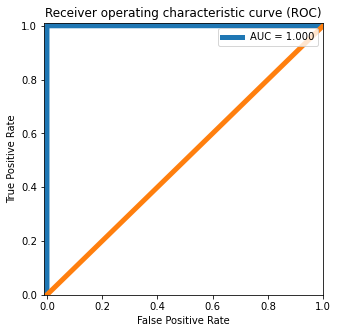

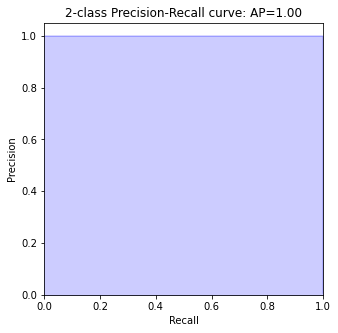

In [193]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)

PrintModelResults("Logistic Regression Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)


In [194]:

# Define the parameter sets to test
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],'max_iter':[50,150,300]}


# Define the model to use
model = LogisticRegression(random_state=5)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=kfolds.split(X_train,y_train), scoring='recall', n_jobs=-1,verbose=1, return_train_score=True)
CV_model.fit(X_train, y_train)
print(CV_model.best_params_)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
{'C': 0.001, 'max_iter': 50, 'penalty': 'l2'}


Logistic Regression with Best parameters:
ROC AUC Score: 0.9997944518301538
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


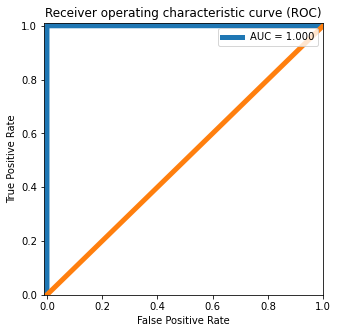

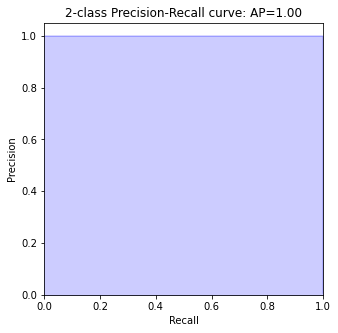

In [195]:
# Build a Logestic Regression using the GridSearchCV parameters
model = LogisticRegression(C= 0.001, penalty= 'l2',max_iter=50)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_train_predicted = model.predict(X_train)
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Logistic Regression with Best parameters:",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

# Module 2: Decision Tree Classifier

Decision Tree Classifier: 
ROC AUC Score: 0.9997944518301538
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


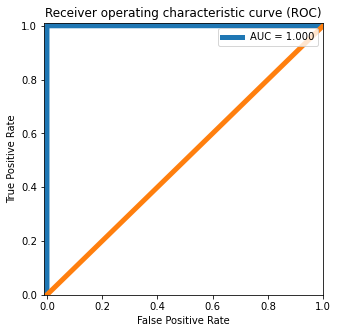

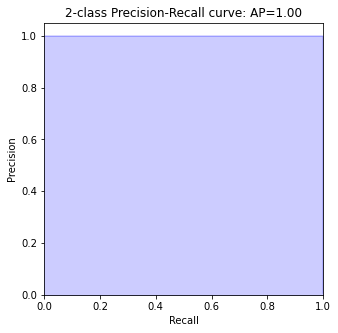

In [196]:
# Fit a Decission Tree  model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Decision Tree Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## To find optimal parameters for Decision Tree Classifier:

In [197]:
# Decision Tree Classifier

# Define the parameter sets to test
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,8,1)), 
              "min_samples_leaf": list(range(5,7,1))}

# Define the model to use
model = DecisionTreeClassifier(random_state=5)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=kfolds.split(X_train,y_train), scoring='recall', n_jobs=-1,verbose=1, return_train_score=True)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
print(CV_model.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


## Model results

Decision Tree Classifier with best parameters: 
ROC AUC Score: 0.9997944518301538
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


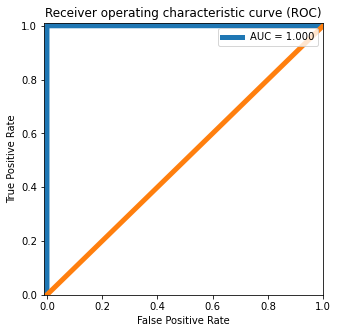

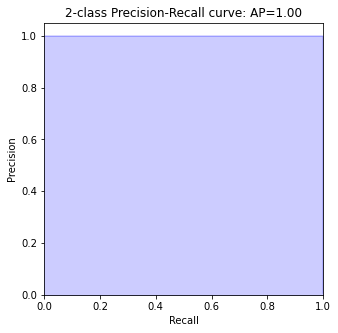

In [198]:
# Build a DecisionTreeClassifier using the GridSearchCV parameters
DT_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5)

# Fit the model to your training data and get the predicted results
DT_model.fit(X_train,y_train)
y_predicted_DT = DT_model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted_DT)

PrintModelResults("Decision Tree Classifier with best parameters: ",y_test, y_predicted_DT,false_positive_rate, true_positive_rate, threshold)

## Model 3: Random Forest 

Random Forest Classifier: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


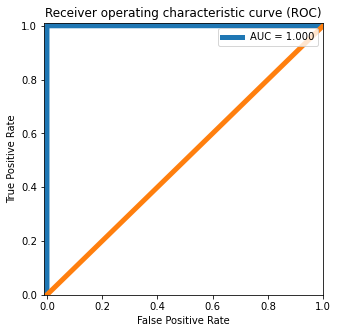

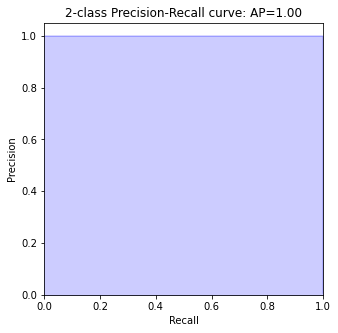

In [199]:
# Fit a Random Forest model to our data
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Random Forest Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## To find optimal parameters for Random Forest Classifier

In [200]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=kfolds.split(X_train,y_train), scoring='recall', n_jobs=-1,verbose=1, return_train_score=True)

#Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
print(CV_model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 1}


## Model results:

Random Forest Classifier with best parameters: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


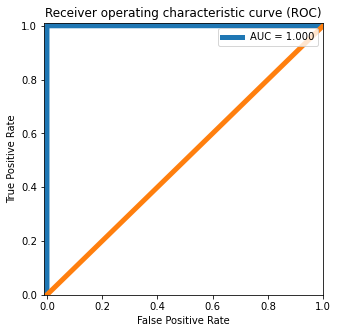

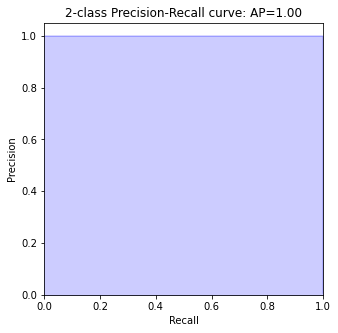

In [201]:
# Build a RandomForestClassifier using the GridSearchCV parameters
model = RandomForestClassifier(bootstrap=True,
                               
                               criterion = 'gini',
                               n_estimators = 1,
                               max_features = 'log2',
                               min_samples_leaf = 5,
                               max_depth = 4,
                               n_jobs = -1,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Random Forest Classifier with best parameters: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## Model 4: XB Booster

[22:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

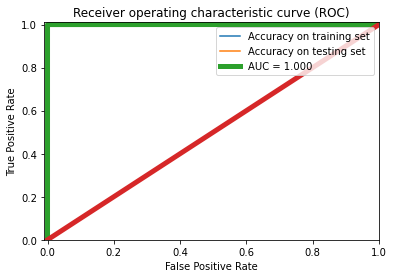

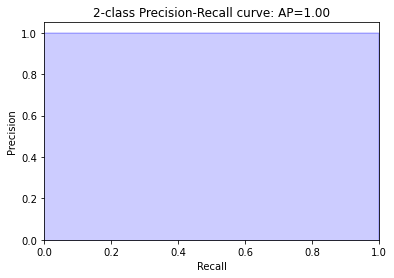

In [202]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of class in XGboost')
plt.ylabel('Accuracy')
plt.legend()


# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XG Boost: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

[22:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


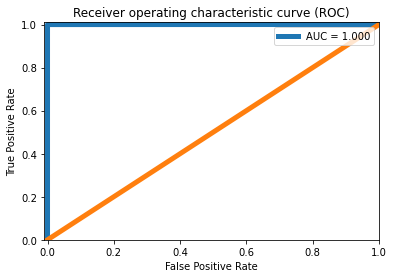

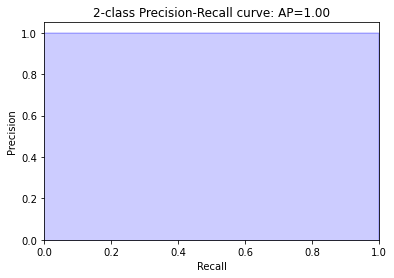

In [203]:
xgb=XGBClassifier(n_estimators=25)
xgb.fit(X_train,y_train)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XGBoost: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## To find optimal parameters for XGBoost:

In [204]:


# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

# Define the model to use
model = XGBClassifier(n_estimators=25)

kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=kfolds.split(X_train,y_train), scoring='recall', n_jobs=-1,verbose=1, return_train_score=True)
  # Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
print(CV_model.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[22:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'learning_rate': 0.2, 'subsample': 0.3}


## Model results:

[22:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost with best parameters: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555

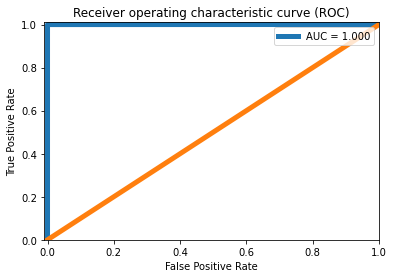

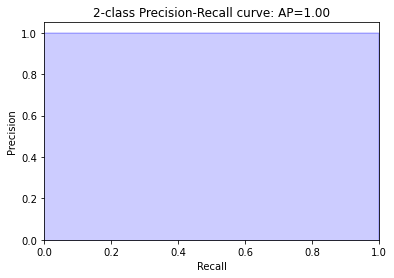

In [205]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}
model=XGBClassifier(params = params)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XG Boost with best parameters: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

### Choosing best model on the imbalanced data

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, Random Forest), almost all of them have performed well. 

But as we have to choose one of them, we can go for the best as `Decission Tree` which gives the maximum ROC AUC score of 100%

## Models on Balanced set

### Sampling Techniques

#### Uniform Oversampling / Under Sampling

### Model 1: Logestic Regression on Balanced Set

In [206]:
rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)


Logistic Regression with RandomUnderSampling: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


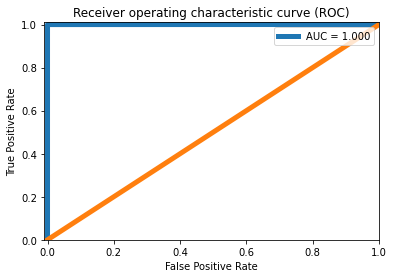

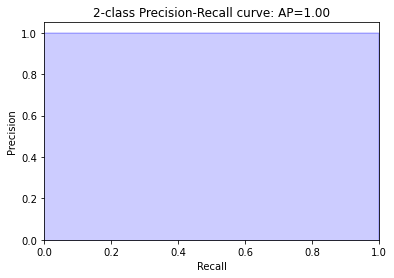

Logistic Regression with RandomOverSampling: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


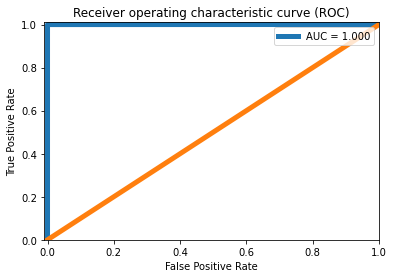

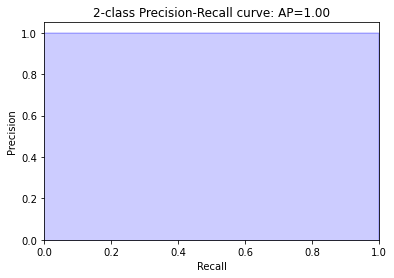

In [207]:
# Fit a logistic regression model to our data
rus_model = LogisticRegression(C= 0.001, penalty= 'l2',max_iter=50).fit(X_train_rus, y_train_rus)
ros_model = LogisticRegression(C= 0.001, penalty= 'l2',max_iter=50).fit(X_train_ros, y_train_ros)



name='Logistic Regression: '
y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)

PrintModelResults('Logistic Regression with RandomUnderSampling: ',y_test, y_rus,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Logistic Regression with RandomOverSampling: ',y_test, y_ros,false_positive_rate, true_positive_rate, threshold)

### Model 2: DecisionTreeClassifier on Balanced Set

In [208]:
rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)


X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)


Decision Tree Classifier with Random UnderSampling: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


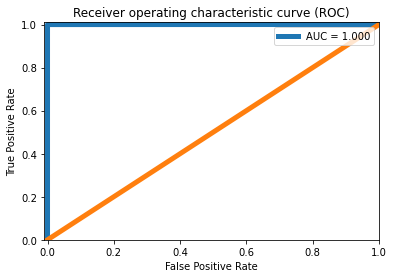

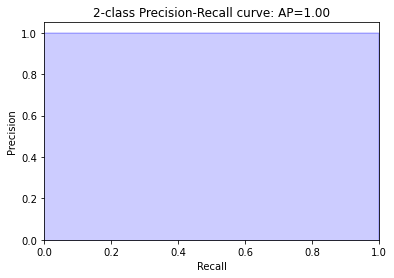

Decision Tree Classifier with Random OverSampling: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


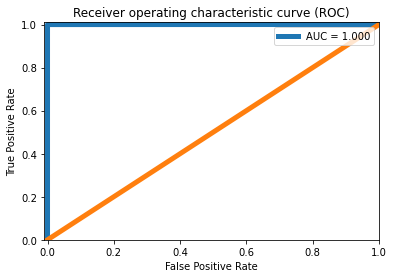

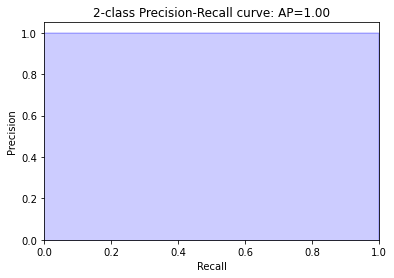

In [209]:
model= DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5)


# Fit a Decission Tree  model to our data
rus_model = model.fit(X_train_rus, y_train_rus)
ros_model = model.fit(X_train_ros, y_train_ros)

name='Decision Tree Classifier: '
y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)


PrintModelResults('Decision Tree Classifier with Random UnderSampling: ',y_test, y_rus,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Decision Tree Classifier with Random OverSampling: ',y_test, y_ros,false_positive_rate, true_positive_rate, threshold)

### RandomForestClassifier on Balanced Set

In [210]:
rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)




Random Forest Classifier with Random UnderSampling: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


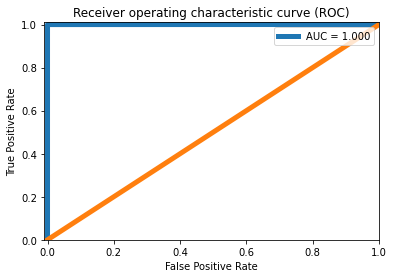

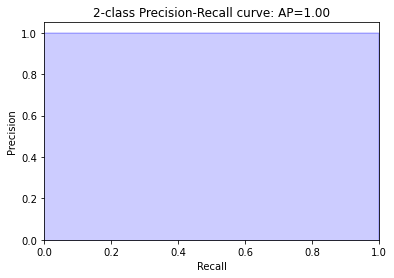

Random Forest Classifier with Random OverSampling: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


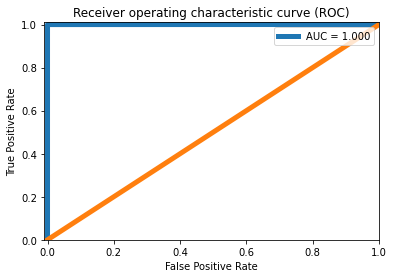

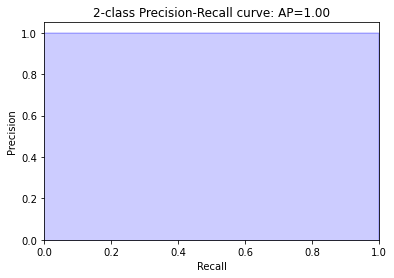

In [211]:
model=RandomForestClassifier(bootstrap=True,
                               
                               criterion = 'gini',
                               n_estimators = 1,
                               max_features = 'log2',
                               min_samples_leaf = 5,
                               max_depth = 4,
                               n_jobs = -1,
                               random_state = 5)



# Fit a Random Forest  model to our data
rus_model = model.fit(X_train_rus, y_train_rus)
ros_model = model.fit(X_train_ros, y_train_ros)

name='Random Forest Classifier: '
y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)


PrintModelResults('Random Forest Classifier with Random UnderSampling: ',y_test, y_rus,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Random Forest Classifier with Random OverSampling: ',y_test, y_ros,false_positive_rate, true_positive_rate, threshold)


# XG Boost with Balanced Data:

In [212]:
rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)


X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)




[22:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

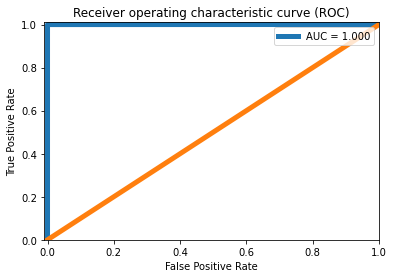

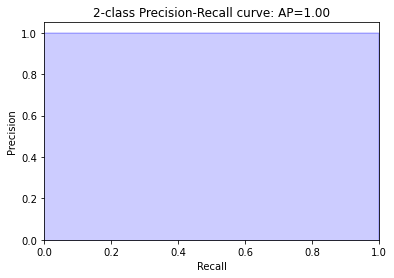

XGBoost Classifier  with Random Over Sampling: 
ROC AUC Score: 0.9999999884411175
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


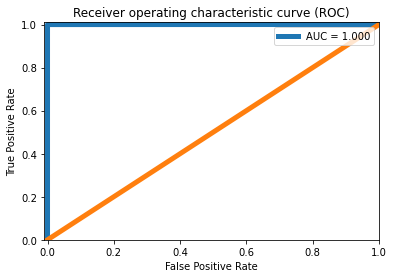

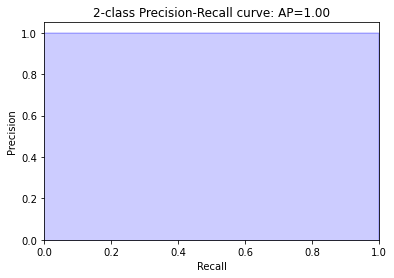

In [213]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}
model=XGBClassifier(params = params)

# Fit a logistic regression model to our data
rus_model = model.fit(X_train_rus, y_train_rus)
ros_model = model.fit(X_train_ros, y_train_ros)

name='XGBoost Classifier: '
y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)


PrintModelResults('XGBoost Classifier with Random Under Sampling: ',y_test, y_rus,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('XGBoost Classifier  with Random Over Sampling: ',y_test, y_ros,false_positive_rate, true_positive_rate, threshold)


## SMOTE Balancing Technique

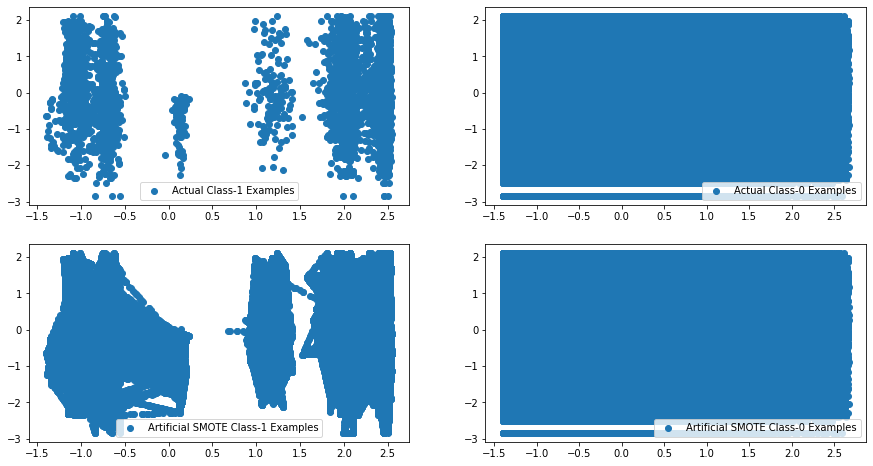

In [214]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_smote_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]
X_train_smote_0 = X_train_smote.to_numpy()[np.where(y_train_smote==0.0)]

plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_train_smote_1[:, 0], X_train_smote_1[:, 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_train_smote_0[:, 0], X_train_smote_0[:, 1],label='Artificial SMOTE Class-0 Examples')
plt.legend()

plt.show()

In [215]:
print('SMOTE oversampling X_train shape:\t', X_train_smote.shape)
print('SMOTE oversampling y_train shape:\t', y_train_smote.shape)
print('X_test shape:\t\t\t\t', X_test.shape)
print('y_test shape:\t\t\t\t', y_test.shape)

SMOTE oversampling X_train shape:	 (2579962, 27)
SMOTE oversampling y_train shape:	 (2579962,)
X_test shape:				 (555745, 27)
y_test shape:				 (555745,)


## Logestic Regression  using SMOTE

In [216]:
# Fit a logistic regression model to our data
model = LogisticRegression(C= 0.001, penalty= 'l2',max_iter=50)
model.fit(X_train_smote, y_train_smote)

# Obtain model predictions
y_predicted = model.predict(X_test)

Evalution

Logistic Regression Classifier: 
ROC AUC Score: 0.9997837239376488
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


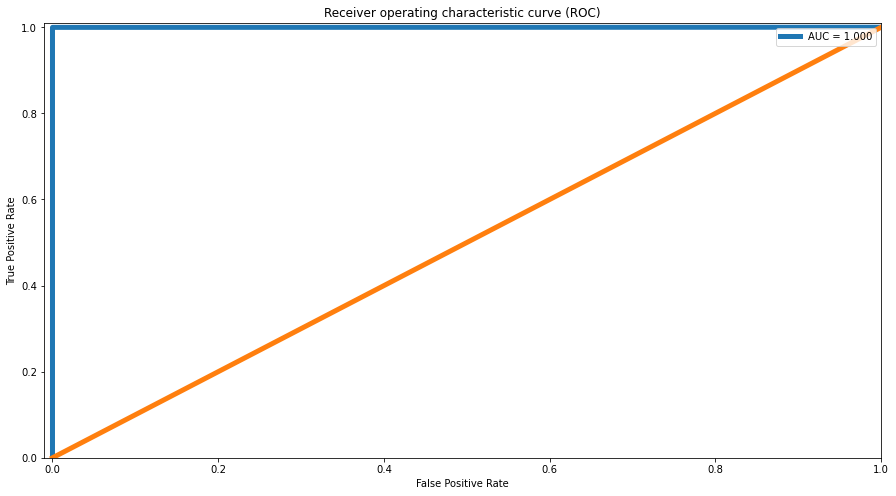

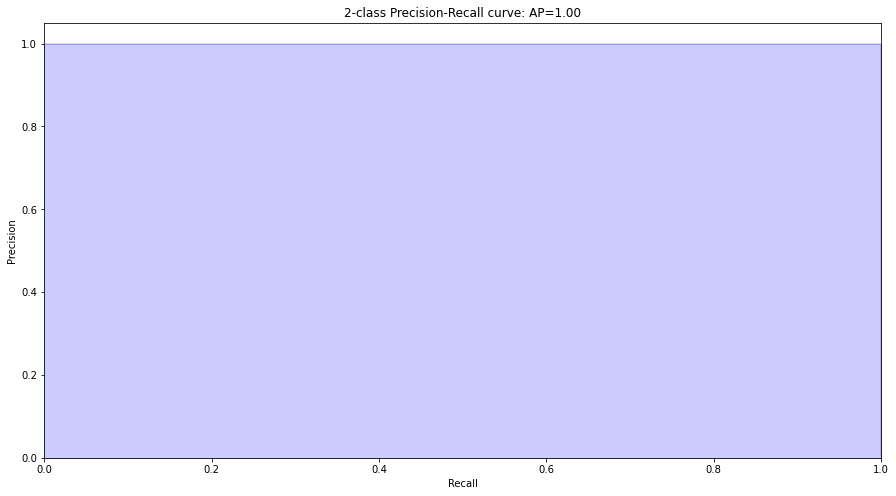

In [217]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)

PrintModelResults("Logistic Regression Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)


### Decission Tree Model  using SMOTE

In [218]:
# Fit a Decission Tree model to our data
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5)
model.fit(X_train_smote, y_train_smote)

# Obtain model predictions
y_predicted = model.predict(X_test)

Evalution

Decission Tree: 
ROC AUC Score: 0.9998272884283247
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


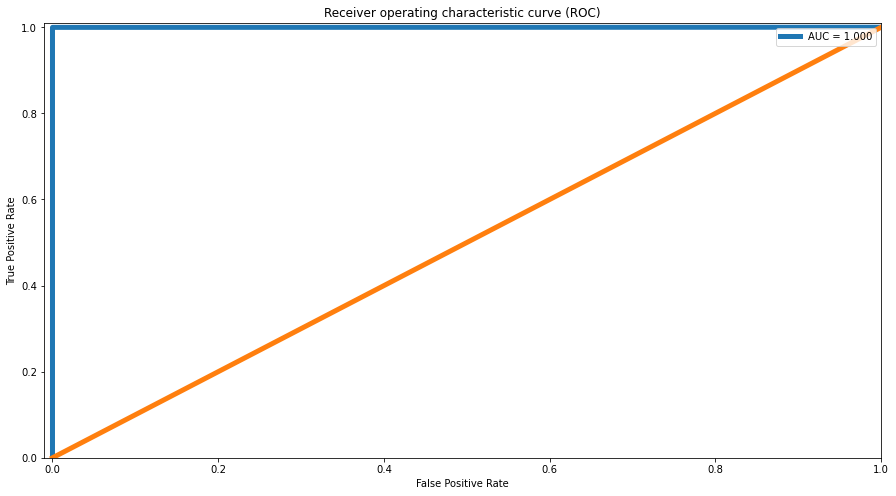

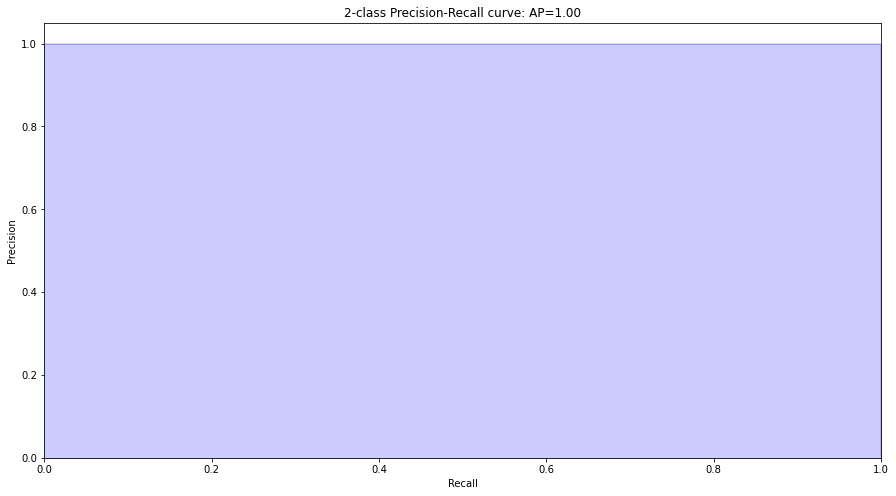

In [219]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)

PrintModelResults("Decission Tree: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)


### Random Forest  using SMOTE

In [220]:
model=RandomForestClassifier(bootstrap=True,
                               
                               criterion = 'gini',
                               n_estimators = 1,
                               max_features = 'log2',
                               min_samples_leaf = 5,
                               max_depth = 4,
                               n_jobs = -1,
                               random_state = 5)




# Fit a Random Forest regression model to our data

model.fit(X_train_smote, y_train_smote)

# Obtain model predictions
y_predicted = model.predict(X_test)



Random Forest: 
ROC AUC Score: 0.9998272884283247
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


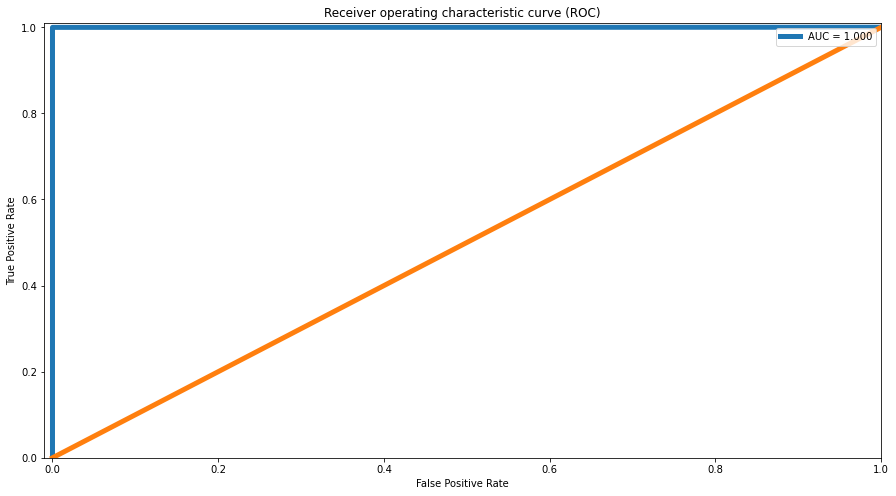

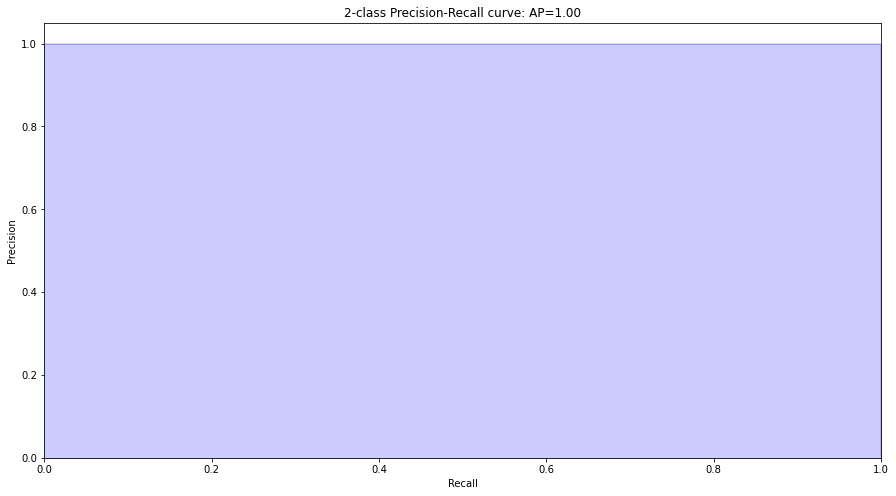

In [221]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)

PrintModelResults("Random Forest: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## XGB Model using SMOTE

In [222]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}
model=XGBClassifier(params = params)
# Fit a XGB Model  to our data


model.fit(X_train_smote, y_train_smote)

# Obtain model predictions
y_predicted = model.predict(X_test)



[22:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGB Model: 
ROC AUC Score: 0.9998272884283247
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552850
           1       1.00      1.00      1.00      2895

    accuracy                           1.00    555745
   macro avg       1.00      1.00      1.00    555745
weighted avg       1.00      1.00      1.00    555745

Confusion matrix:
 [[552850      0]
 [     1   2894]]
Accuracy :1.00000
F1 Score: 0.999827258593885
Recall score: 0.9996545768566494
Precision score: 1.0


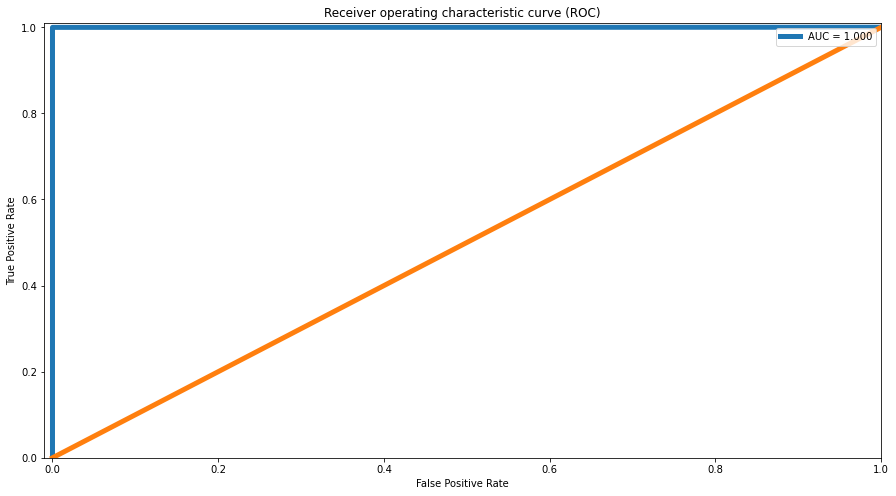

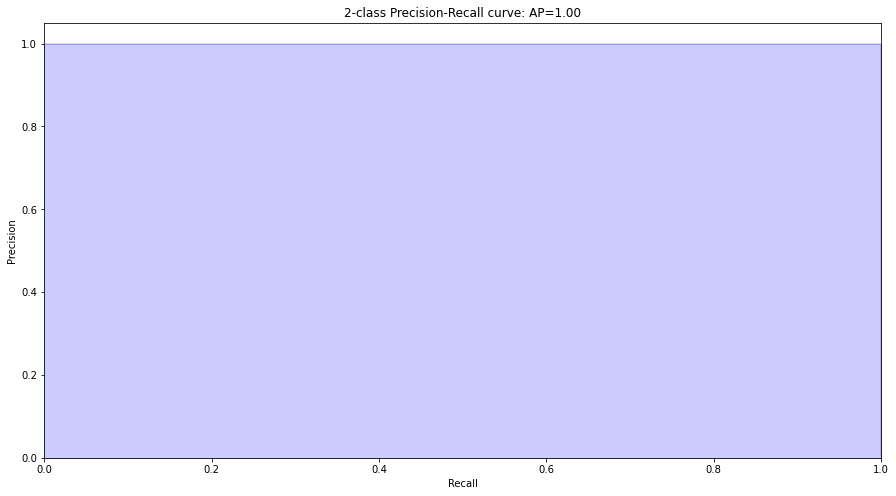

In [223]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)

PrintModelResults("XGB Model: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

Choosing best model on the balanced data
He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Hence, we can conclude that the Random Forest model with SMOTE is the best model for its simplicity and less resource requirement.

#### Cost Benefit Analysis

In [224]:
month_wise_summary.head()

year_month  Total Transactions  Fraud_Trans Yes  Fraud_Trans No  \
0    2019-01               52525              506           52019   
1    2019-02               49866              517           49349   
2    2019-03               70939              494           70445   
3    2019-04               68078              376           67702   
4    2019-05               72532              408           72124   

   Fraud Tr Percentage  
0             0.963351  
1             1.036779  
2             0.696373  
3             0.552308  
4             0.562510

#### Average number of transactions per month

In [225]:
avg_total_tr_per_month = month_wise_summary['Total Transactions'].mean()

#### Average number of fraudulent transaction per month

In [226]:
avg_total_fr_tr_per_month = month_wise_summary['Fraud_Trans Yes'].mean()

### Average amount per fraud transaction

In [227]:
avg_amt_per_fr = final_df[final_df['is_fraud'] == 1].amt.mean()

In [228]:
print("Average number of transactions per month",avg_total_tr_per_month)
print("Average number of fraudulent transaction per month",avg_total_fr_tr_per_month)
print("Average amount per fraud transaction",avg_amt_per_fr)

Average number of transactions per month 77183.08333333333
Average number of fraudulent transaction per month 402.125
Average amount per fraud transaction 530.6614122888789


### Note:

As our  model detects all the fraudalent transactions, cost benifit is 

402.125* $1.5 (executive cost) = 603.1875

Cost incurred before model is 213392.0546 - 603.1875 = 212788.8671
